## 이렇게 가면 좋겠다

### 데이터 불러오기

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
plt.rc("axes", unicode_minus=False) # 마이너스 부호가 보일수 있게 하겠다
# pd.options.display.max_columns = None
df = pd.read_csv('1년부실징후직접계산.csv',encoding='cp949')
df = df.replace(1254789.63,np.nan)
# df['이자보상배율'] = df['이자보상배율'].replace(11111111.11,np.nan) # 임의로 설정한 값 변경
# df['이자보상배율'] = df['이자보상배율'].replace(0,1)
# df['이자보상배율'] = df['이자보상배율'].fillna(df.groupby('회사명')['이자보상배율'].transform('max'))
# df = df.drop(columns=['경상개발비비율','무형자산개발비비율','통계청 한국표준산업분류 10차(소분류)'])
# df['회계년도'] = pd.to_datetime(df['회계년도'], format='%d-%b').dt.strftime('20%d-%m')
# 거래소 코드 6자리가 아닌 것들은 6자리가 될 때까지 앞에 0 추가
df['거래소코드'] = df['거래소코드'].astype(str).str.zfill(6)
df['거래소코드']
df

,회사명,거래소코드,회계년도,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,매출액증가율,재고자산증가율,자기자본증가율,...,타인자본구성비율,재고자산_대_유동자산비율,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율
0,(주)CMG제약,058820,Dec-11,3.53,1.98,-5.90,17.64,56.40,-1.43,-2.02,...,33.95,17.88,35.59,28.23,71.32,19.75,204.06,35.86,12.72,19.56
1,(주)CMG제약,058820,Dec-12,-7.75,109.15,-4.12,207.08,-8.43,7.73,75.17,...,44.68,6.27,7.33,70.60,69.14,18.64,425.29,2.89,0.47,1.66
2,(주)CMG제약,058820,Dec-13,0.70,-2.09,16.09,-18.89,25.51,56.29,55.10,...,12.37,12.09,14.12,58.50,66.01,17.77,411.48,77.91,12.51,34.29
3,(주)CMG제약,058820,Dec-14,3.60,3.86,74.30,-25.93,11.52,6.37,0.01,...,15.61,17.36,25.09,33.72,113.90,32.60,354.43,37.80,12.16,31.04
4,(주)CMG제약,058820,Dec-15,-32.22,-2.64,-5.37,-7.17,18.85,11.04,-4.48,...,17.20,20.77,31.32,30.82,114.25,30.43,362.77,24.21,7.63,15.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,흥아해운(주),003280,Dec-14,1.12,13.69,45.19,-13.68,7.17,-8.50,7.76,...,74.22,8.60,0.00,-12.59,423.67,0.00,831.53,27.88,13.89,10.93
9167,흥아해운(주),003280,Dec-15,1.02,21.93,49.36,-11.18,2.42,-12.92,3.39,...,78.14,8.43,0.00,-15.94,589.65,0.00,948.60,21.49,13.11,12.28
9168,흥아해운(주),003280,Dec-16,0.21,21.08,38.84,-25.08,-1.58,56.39,11.22,...,79.92,17.60,0.00,-16.34,703.55,0.00,1000.62,15.81,10.98,12.66
9169,흥아해운(주),003280,Dec-17,-0.42,-11.43,-16.50,13.29,0.56,11.18,-39.28,...,86.23,17.27,0.00,-24.48,0.00,0.00,0.00,8.35,5.43,5.51


In [ ]:
a = df[df['회사명'].str.contains('(주)고려시멘트','(주)국전약품','(주)나노','(주)나인테크','(주)넥슨게임즈','(주)넵튠','(주)누보','(주)다보링크',
                              '(주)더블유에스아이','(주)덴티스','(주)드림시큐리티','(주)디딤','(주)디알텍','(주)디와이디','(주)러셀','(주)레이크머티리얼즈',
                              '(주)로보로보','(주)모비스','(주)미래생명자원','(주)바이오로그디바이스','(주)베노홀딩스','(주)본느','(주)비올','(주)비투엔',
                              '(주)삼기','(주)서진오토모티브','(주)세림비앤지','(주)세토피아','(주)세화피앤씨','(주)셀바스헬스케어','(주)스튜디오산타클로스엔터테인먼트',
                              '(주)썸에이지','(주)쎄노텍','(주)아이비김영','(주)아이엘사이언스','(주)알로이스','(주)알톤스포츠','(주)애니플러스','(주)액션스퀘어',
                              '(주)에치에프알','(주)에프에스엔','(주)엑셈','(주)엔투텍','(주)엔피','(주)예선테크','(주)오하임아이엔티','(주)옵투스제약',
                              '(주)와이즈버즈','(주)우정바이오','(주)원바이오젠','(주)웨이버스','(주)위메이드플레이','(주)이노인스트루먼트','(주)이랜시스',
                              '(주)인산가','(주)일승','(주)자비스','(주)정다운','(주)제이시스메디칼','(주)지니틱스','(주)지란지교시큐리티','(주)카이노스메드',
                              '(주)켐온','(주)켐트로스','(주)코퍼스코리아','(주)큐브엔터테인먼트','(주)클래시스','(주)태성','(주)토박스코리아','(주)티에스트릴리온',
                              '(주)포인트엔지니어링','(주)프로스테믹스','(주)프로이천','(주)하이비젼시스템','(주)한국비엔씨','(주)한송네오텍','(주)한일진공',
                              '(주)화신정공','(주)휴센텍','글로벌텍스프리(주)','나무기술(주)','디와이씨(주)','미스터블루(주)','바디텍메드(주)','소프트캠프(주)',
                              '씨아이에스(주)','알서포트(주)','알에프에이치아이씨(주)','에스지에이솔루션즈(주)','엠에프엠코리아(주)','와이아이케이(주)','원텍(주)',
                              '윈텍(주)','줌인터넷(주)','지엔원에너지(주)','지엘팜텍(주)','케이에이치건설(주)','케이엠제약(주)','코리아에프티(주)','패션플랫폼(주)',
                              '현대무벡스(주)','휴마시스(주)','(주)네오셈')].index
df.drop(a, inplace=True)
a

In [26]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '매출액증가율', '재고자산증가율', '자기자본증가율', '순이익증가율', '정상영업이익증가율', '매출액총이익율',
       '매출액순이익율', '자기자본순이익율', '총자본정상영업이익율', '매출액정상영업이익율', '총자본순이익율', '총자본회전율',
       '재고자산회전율', '매출채권회전율', '유형자산회전율', '매입채무회전율', '자기자본회전율', '타인자본회전율',
       '유동자산회전율', '당좌자산회전률', '순운전자본회전률', '유동비율', '당좌비율', '현금비율', '부채비율',
       '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율', 'CASH_FLOW_대_차입금비율',
       '자기자본구성비율', '차입금비율', '당좌자산구성비율', '유동자산구성비율', '매출채권_대_매입채무비율',
       '단기차입금_대_총차입금비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율'],
      dtype='object')

In [27]:
colm = df[['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '매출액증가율', '재고자산증가율', '자기자본증가율', '순이익증가율', '정상영업이익증가율', '매출액총이익율',
       '매출액순이익율', '자기자본순이익율', '총자본정상영업이익율', '매출액정상영업이익율', '총자본순이익율', '총자본회전율',
       '재고자산회전율', '매출채권회전율', '유형자산회전율', '매입채무회전율', '자기자본회전율', '타인자본회전율',
       '유동자산회전율', '당좌자산회전률', '순운전자본회전률', '유동비율', '당좌비율', '현금비율', '부채비율',
       '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율', 'CASH_FLOW_대_차입금비율',
       '자기자본구성비율', '차입금비율', '당좌자산구성비율', '유동자산구성비율', '매출채권_대_매입채무비율',
       '단기차입금_대_총차입금비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율']]

In [28]:
df.isna().sum()

회사명                    0
거래소코드                  0
회계년도                   0
이자보상배율                 0
총자산증가율               135
유형자산증가율              135
유동자산증가율              135
매출액증가율               135
재고자산증가율              135
자기자본증가율              135
순이익증가율               135
정상영업이익증가율            135
매출액총이익율              135
매출액순이익율              135
자기자본순이익율             135
총자본정상영업이익율           135
매출액정상영업이익율           135
총자본순이익율              135
총자본회전율               135
재고자산회전율              135
매출채권회전율              135
유형자산회전율              135
매입채무회전율              135
자기자본회전율              135
타인자본회전율              135
유동자산회전율              135
당좌자산회전률              135
순운전자본회전률             135
유동비율                 135
당좌비율                 135
현금비율                 135
부채비율                 135
차입금의존도               135
CASH_FLOW_대_부채비율     135
CASH_FLOW_대_매출액비율    135
CASH_FLOW_대_차입금비율    135
자기자본구성비율             135
차입금비율                135
당좌자산구성비율             135
유동자산구성비율             135


<AxesSubplot:>

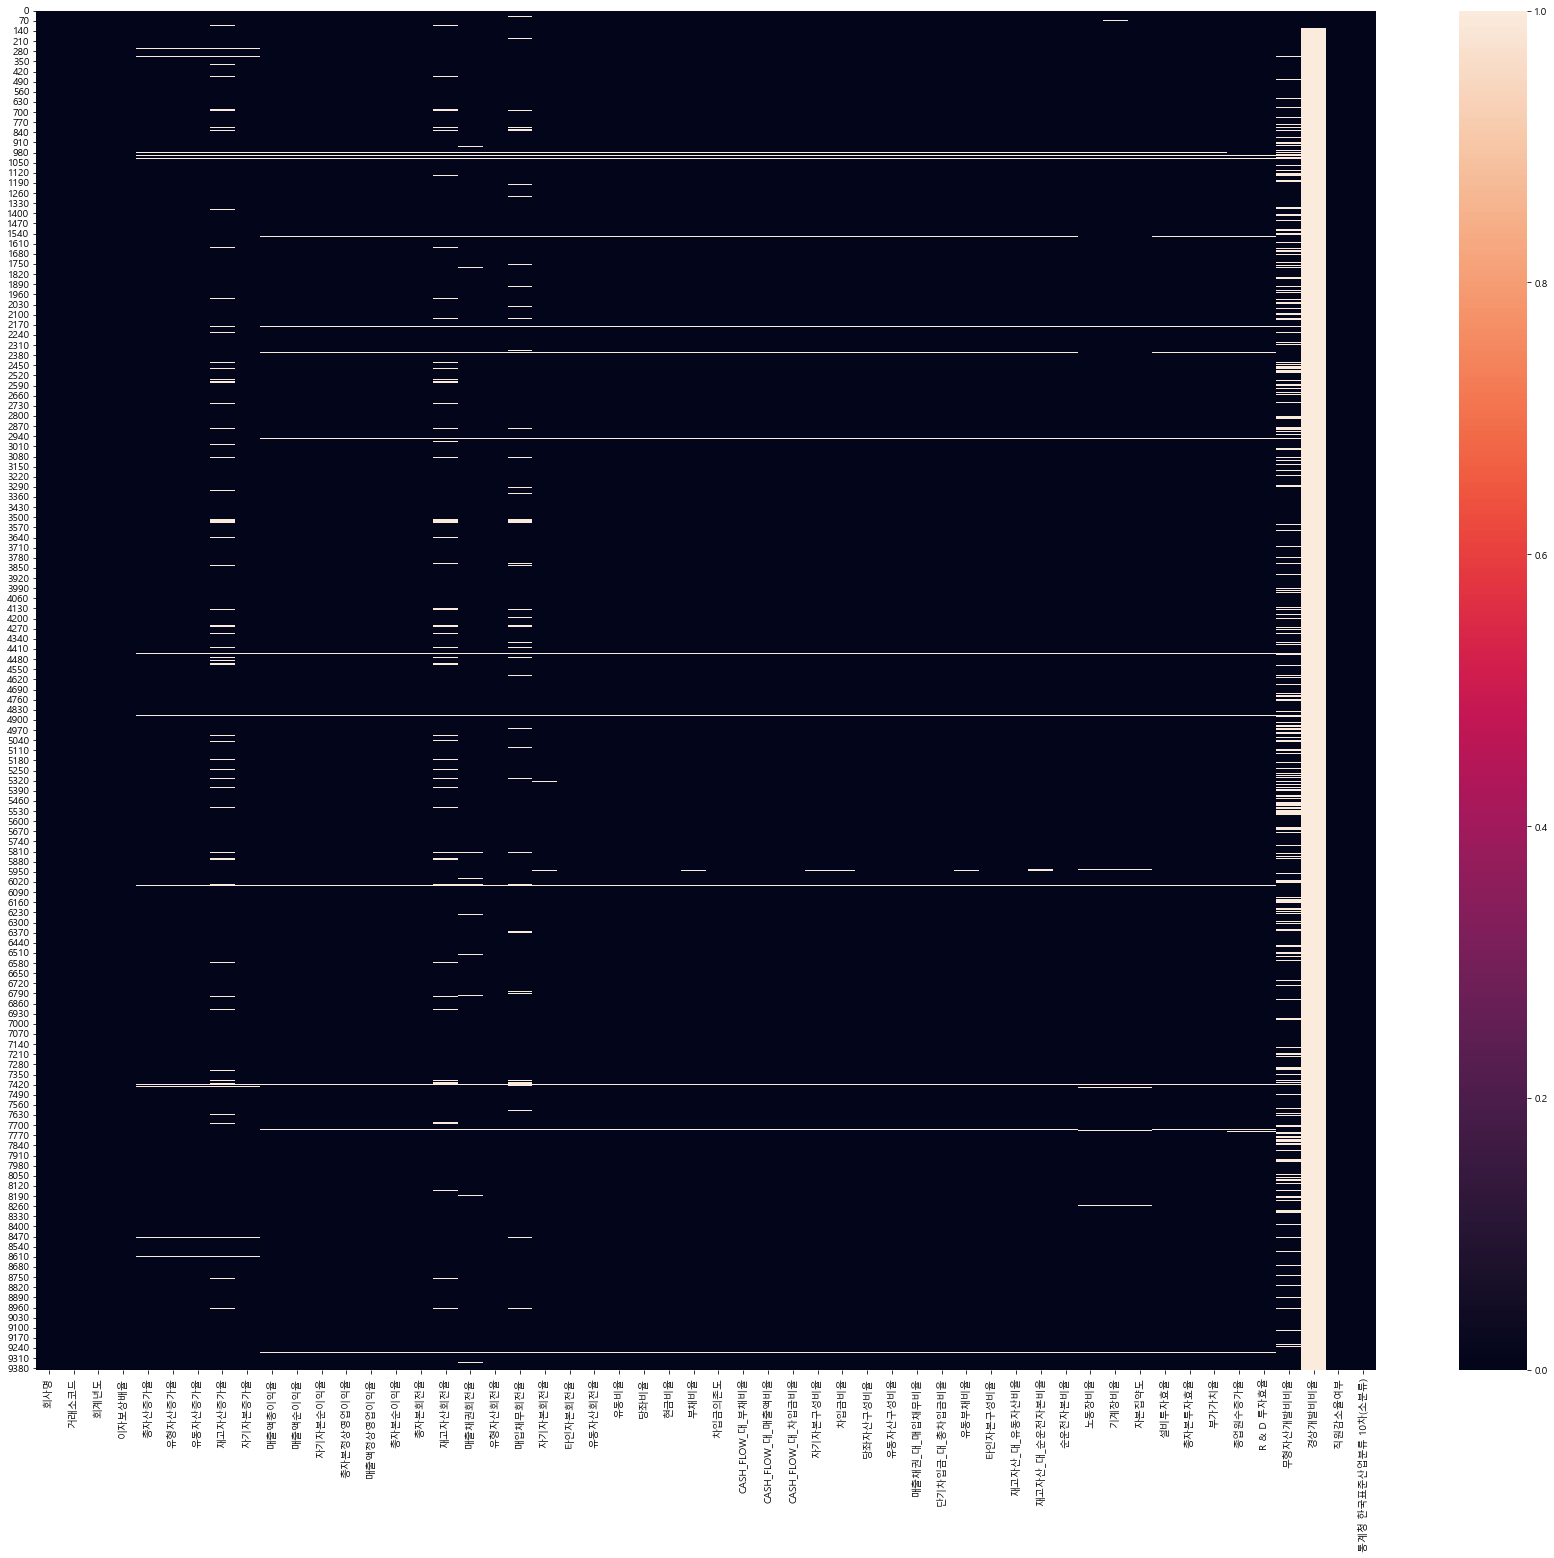

In [5]:
plt.figure(figsize=(30,25))

sns.heatmap(df.isna())

### 결측치 처리

In [6]:
# 회계년도가 12월이 아닌 행 리스트 생성
not_dec_list = df[~df.loc[:,'회계년도'].str.endswith('12')].index.tolist()
not_dec_list

[86,
 474,
 475,
 476,
 477,
 478,
 479,
 480,
 1120,
 1121,
 1122,
 1123,
 1124,
 1125,
 1126,
 1127,
 1128,
 1233,
 1234,
 1271,
 1272,
 1273,
 1274,
 1275,
 1276,
 1277,
 1278,
 1279,
 1340,
 1341,
 1342,
 1343,
 1344,
 1345,
 1346,
 1347,
 1348,
 1439,
 1506,
 1507,
 1508,
 1509,
 1510,
 1511,
 1512,
 1513,
 1514,
 1515,
 1516,
 1517,
 1518,
 1519,
 1520,
 1521,
 1522,
 1578,
 1579,
 1580,
 1581,
 1582,
 1583,
 1584,
 1585,
 1586,
 1852,
 1853,
 1854,
 1855,
 1856,
 1857,
 1858,
 1859,
 1860,
 1942,
 1943,
 2370,
 2371,
 2372,
 2373,
 2374,
 2475,
 2580,
 2581,
 2582,
 2583,
 2584,
 2585,
 2586,
 2587,
 2588,
 3200,
 3201,
 3202,
 3203,
 3204,
 3205,
 3206,
 3207,
 3208,
 3279,
 3280,
 3281,
 3282,
 3592,
 3983,
 3984,
 3985,
 3986,
 3987,
 3988,
 3989,
 3990,
 3991,
 4387,
 4388,
 4389,
 4390,
 4391,
 4392,
 4393,
 4394,
 4395,
 5119,
 5120,
 5121,
 5397,
 5398,
 5709,
 5710,
 5711,
 5712,
 5713,
 5714,
 5715,
 5716,
 5717,
 6024,
 6039,
 6040,
 6041,
 6042,
 6043,
 6044,
 6133,
 

In [7]:
# 회계년도가 12월이 아닌 행 제거
print(df.shape)
df.drop(df.index[not_dec_list], inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.shape)

(9390, 54)
(9164, 54)


In [8]:
df

,회사명,거래소코드,회계년도,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,재고자산증가율,자기자본증가율,매출액총이익율,...,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원수증가율,R & D 투자효율,무형자산개발비비율,경상개발비비율,직원감소율여부,통계청 한국표준산업분류 10차(소분류)
0,(주)CMG제약,058820,2011-12,3.53,1.98,-5.90,17.64,-1.43,-2.02,41.83,...,204.06,35.86,12.72,19.56,4.65,0.13,0.00,-0.000100,0,의약품 제조업
1,(주)CMG제약,058820,2012-12,-7.75,109.15,-4.12,207.08,7.73,75.17,28.34,...,425.29,2.89,0.47,1.66,-0.74,0.74,0.00,-0.000070,0,의약품 제조업
2,(주)CMG제약,058820,2013-12,0.70,-2.09,16.09,-18.89,56.29,55.10,38.70,...,411.48,77.91,12.51,34.29,1.49,0.66,0.29,0.000274,0,의약품 제조업
3,(주)CMG제약,058820,2014-12,3.60,3.86,74.30,-25.93,6.37,0.01,37.07,...,354.43,37.80,12.16,31.04,20.59,0.51,0.15,0.001260,1,의약품 제조업
4,(주)CMG제약,058820,2015-12,-32.22,-2.64,-5.37,-7.17,11.04,-4.48,36.26,...,362.77,24.21,7.63,15.96,-4.88,3.08,0.13,-0.000091,0,의약품 제조업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9159,흥아해운(주),003280,2014-12,1.12,13.69,45.19,-13.68,-8.50,7.76,5.61,...,831.53,27.88,13.89,10.93,9.90,0.00,0.00,NaN,0,해상 운송업
9160,흥아해운(주),003280,2015-12,1.02,21.93,49.36,-11.18,-12.92,3.39,6.20,...,948.60,21.49,13.11,12.28,7.68,0.00,0.00,NaN,0,해상 운송업
9161,흥아해운(주),003280,2016-12,0.21,21.08,38.84,-25.08,56.39,11.22,4.49,...,1000.62,15.81,10.98,12.66,15.87,0.00,0.00,NaN,0,해상 운송업
9162,흥아해운(주),003280,2017-12,-0.42,-11.43,-16.50,13.29,11.18,-39.28,2.09,...,921779.07,8.35,5.43,5.51,-2.23,0.00,0.00,NaN,0,해상 운송업


In [9]:
# 거래소코드가 9로 시작하는 기업
code_nine_list = df['회사명'][df['거래소코드'].astype(str).str.startswith('9')].unique()
code_nine_list

array(['(주)엑세스바이오인코퍼레이션', '애머릿지코퍼레이션', '엘브이엠씨홀딩스(주)', '잉글우드랩(주)',
       '코오롱티슈진(주)', '헝셩그룹유한회사'], dtype=object)

In [10]:
# 거래소코드가 9로 시작하는 기업 제거
df = df[~df['회사명'].isin(code_nine_list)]
df.reset_index(drop=True, inplace=True)
print(df.shape)

(9127, 54)


In [11]:
# 기업 기록이 하나인 기업
single_rows = df['회사명'].value_counts() < 2
single_rows[single_rows]

(주)비츠로테크          True
올리패스(주)           True
(주)엔투텍            True
(주)수젠텍            True
씨제이바이오사이언스(주)     True
(주)이노테라피          True
브릿지바이오테라퓨틱스(주)    True
(주)마이크로디지탈        True
(주)캐리소프트          True
(주)신테카바이오         True
(주)노랑풍선           True
(주)메드팩토           True
(주)라파스            True
(주)에이스토리          True
(주)플리토            True
(주)나노브릭           True
(주)세림비앤지          True
(주)제이엘케이          True
(주)티움바이오          True
(주)라닉스            True
Name: 회사명, dtype: bool

In [12]:
# 기업 기록이 하나인 기업 제거
df = df[~df['회사명'].isin(single_rows[single_rows].index)]
df.reset_index(drop=True, inplace=True)
print(df.shape)

(9107, 54)


In [13]:
# df.to_csv('1년연속부실징후기업_테스트.csv',encoding='cp949')

In [14]:
df.isna().sum()

회사명                         0
거래소코드                       0
회계년도                        0
이자보상배율                      0
총자산증가율                     99
유형자산증가율                   101
유동자산증가율                    98
재고자산증가율                   510
자기자본증가율                   105
매출액총이익율                    99
매출액순이익율                   100
자기자본순이익율                  107
총자본정상영업이익율                100
매출액정상영업이익율                100
총자본순이익율                   100
총자본회전율                    104
재고자산회전율                   489
매출채권회전율                   165
유형자산회전율                   103
매입채무회전율                   401
자기자본회전율                   116
타인자본회전율                   103
유동자산회전율                   107
유동비율                      100
당좌비율                      100
현금비율                      100
부채비율                      106
차입금의존도                    100
CASH_FLOW_대_부채비율          100
CASH_FLOW_대_매출액비율         100
CASH_FLOW_대_차입금비율         100
자기자본구성비율                  104
차입금비율                     106
당좌자산구성비율  

In [176]:
# medi = lambda x: x.fillna(x.median())
# df = df.groupby('회사명').apply(medi)
# df = df.dropna()
# df = df.reset_index(drop=True)

In [243]:
# df

### 이상치 처리

박스플롯으로 그냥 보기

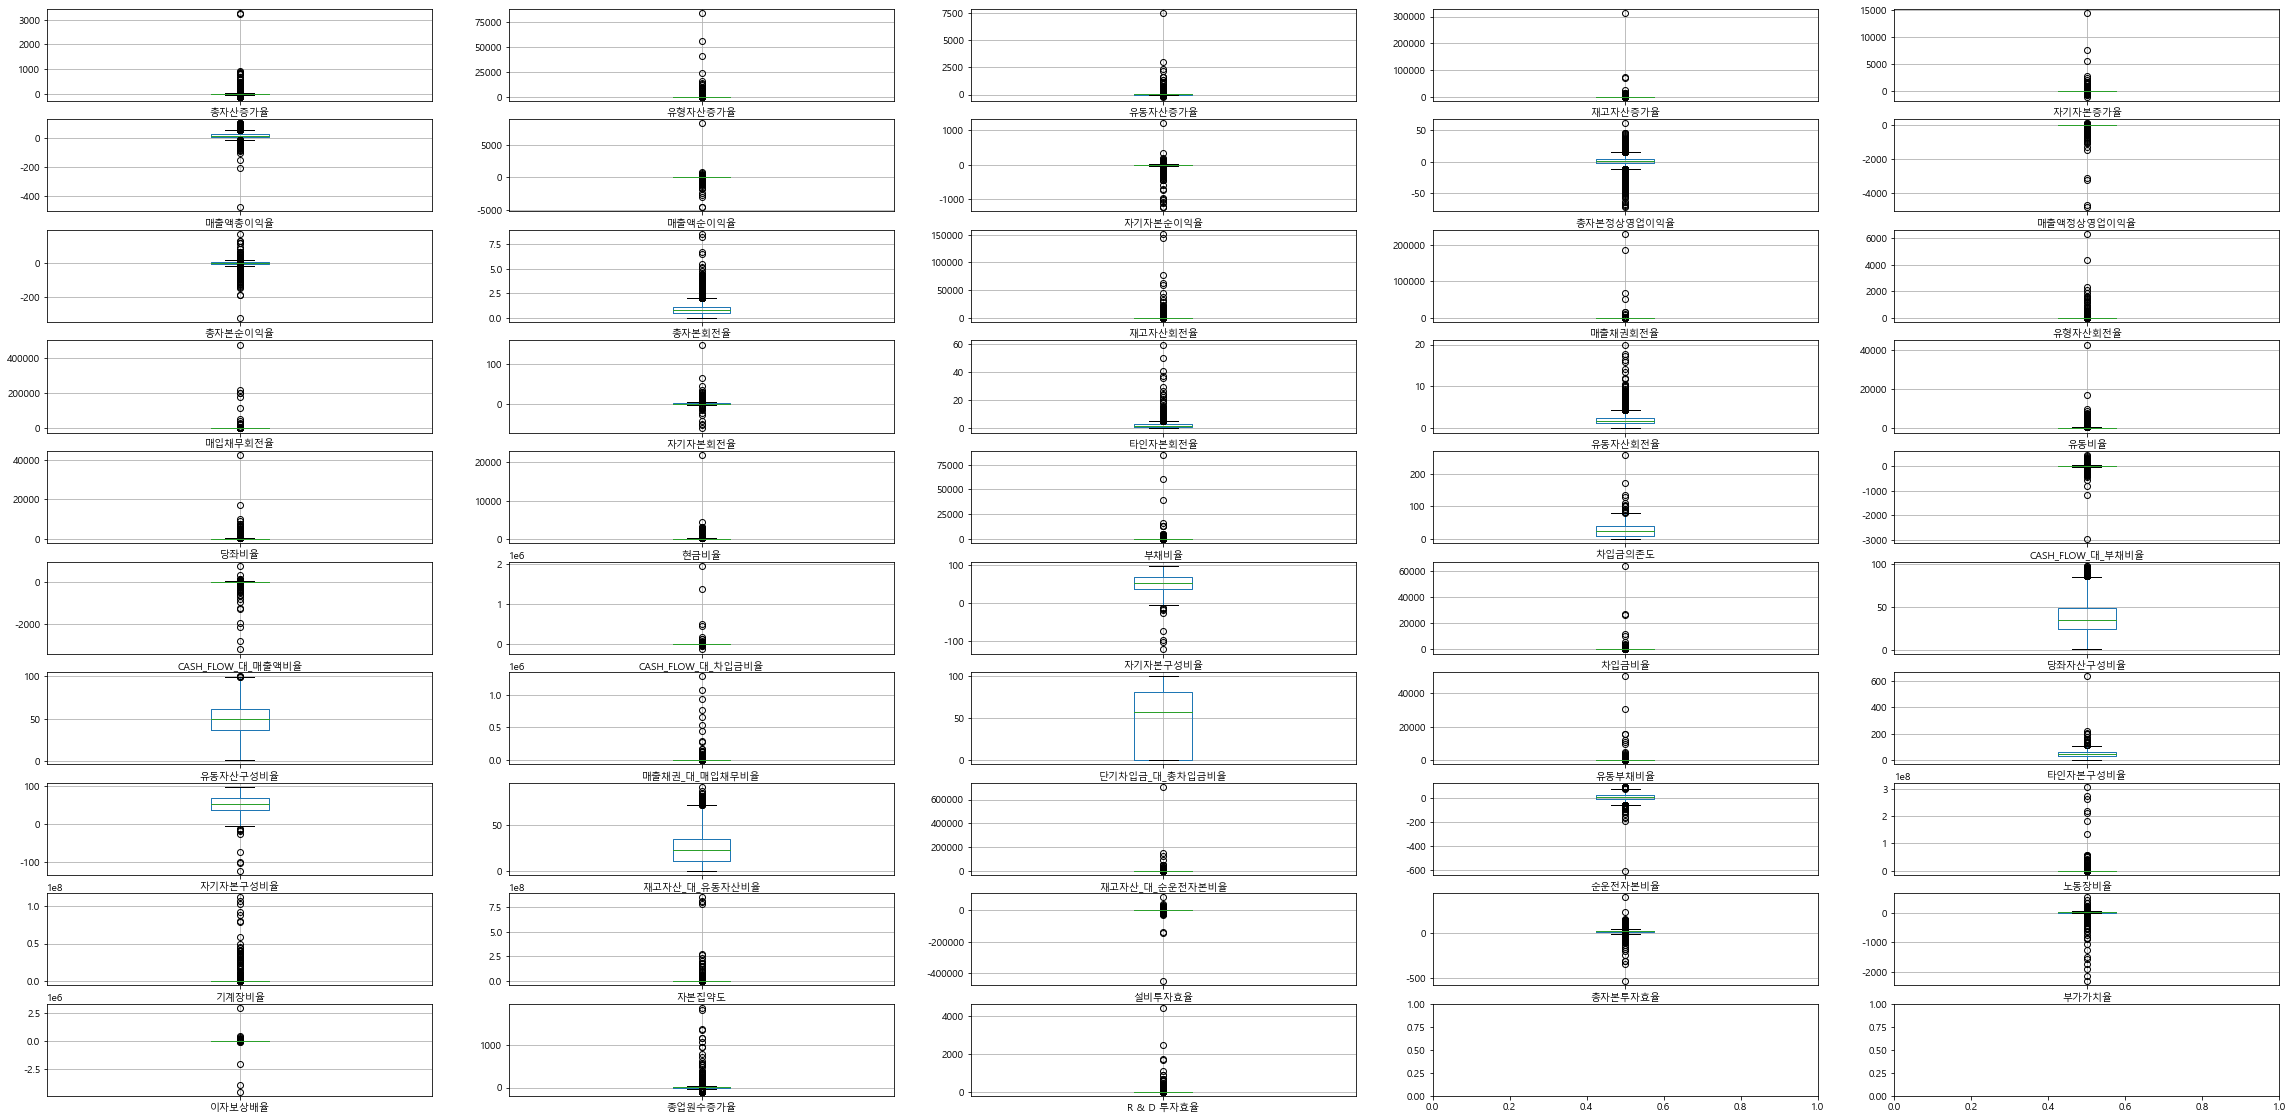

In [180]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(10, 5)
fig.set_size_inches((40,20))

df.boxplot(column='총자산증가율', ax=axes[0,0])
df.boxplot(column='유형자산증가율', ax=axes[0,1])
df.boxplot(column='유동자산증가율', ax=axes[0,2])
df.boxplot(column='재고자산증가율', ax=axes[0,3])
df.boxplot(column='자기자본증가율', ax=axes[0,4])
df.boxplot(column='매출액총이익율', ax=axes[1,0])
df.boxplot(column='매출액순이익율', ax=axes[1,1])
df.boxplot(column='자기자본순이익율', ax=axes[1,2])
df.boxplot(column='총자본정상영업이익율', ax=axes[1,3])
df.boxplot(column='매출액정상영업이익율', ax=axes[1,4])
df.boxplot(column='총자본순이익율', ax=axes[2,0])
df.boxplot(column='총자본회전율', ax=axes[2,1])
df.boxplot(column='재고자산회전율', ax=axes[2,2])
df.boxplot(column='매출채권회전율', ax=axes[2,3])
df.boxplot(column='유형자산회전율', ax=axes[2,4])
df.boxplot(column='매입채무회전율', ax=axes[3,0])
df.boxplot(column='자기자본회전율', ax=axes[3,1])
df.boxplot(column='타인자본회전율', ax=axes[3,2])
df.boxplot(column='유동자산회전율', ax=axes[3,3])
df.boxplot(column='유동비율', ax=axes[3,4])
df.boxplot(column='당좌비율', ax=axes[4,0])
df.boxplot(column='현금비율', ax=axes[4,1])
df.boxplot(column='부채비율', ax=axes[4,2])
df.boxplot(column='차입금의존도', ax=axes[4,3])
df.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,4])
df.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[5,0])
df.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[5,1])
df.boxplot(column='자기자본구성비율', ax=axes[5,2])
df.boxplot(column='차입금비율', ax=axes[5,3])
df.boxplot(column='당좌자산구성비율', ax=axes[5,4])
df.boxplot(column='유동자산구성비율', ax=axes[6,0])
df.boxplot(column='매출채권_대_매입채무비율', ax=axes[6,1])
df.boxplot(column='단기차입금_대_총차입금비율', ax=axes[6,2])
df.boxplot(column='유동부채비율', ax=axes[6,3])
df.boxplot(column='타인자본구성비율', ax=axes[6,4])
df.boxplot(column='자기자본구성비율', ax=axes[7,0])
df.boxplot(column='재고자산_대_유동자산비율', ax=axes[7,1])
df.boxplot(column='재고자산_대_순운전자본비율', ax=axes[7,2])
df.boxplot(column='순운전자본비율', ax=axes[7,3])
df.boxplot(column='노동장비율', ax=axes[7,4])
df.boxplot(column='기계장비율', ax=axes[8,0])
df.boxplot(column='자본집약도', ax=axes[8,1])
df.boxplot(column='설비투자효율', ax=axes[8,2])
df.boxplot(column='총자본투자효율', ax=axes[8,3])
df.boxplot(column='부가가치율', ax=axes[8,4])
df.boxplot(column='이자보상배율', ax=axes[9,0])
df.boxplot(column='종업원수증가율', ax=axes[9,1])
df.boxplot(column='R & D 투자효율', ax=axes[9,2])
# df.boxplot(column='무형자산개발비비율', ax=axes[9,3])

plt.show()

### 이상치 제거

In [200]:
cols = []

total_df1_iqr = df.copy()
total_df1_iqr = total_df1_iqr[['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '재고자산증가율', '자기자본증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본정상영업이익율',
       '매출액정상영업이익율', '총자본순이익율', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '유동비율', '당좌비율', '현금비율',
       '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '차입금비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '단기차입금_대_총차입금비율', '유동부채비율', '타인자본구성비율',
       '재고자산_대_유동자산비율', '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도',
       '설비투자효율', '총자본투자효율', '부가가치율', '종업원수증가율', 'R & D 투자효율', '직원감소율여부']]
cols.append([col for col in total_df1_iqr])

Q1 = total_df1_iqr[['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '재고자산증가율', '자기자본증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본정상영업이익율',
       '매출액정상영업이익율', '총자본순이익율', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '유동비율', '당좌비율', '현금비율',
       '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '차입금비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '단기차입금_대_총차입금비율', '유동부채비율', '타인자본구성비율',
       '재고자산_대_유동자산비율', '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도',
       '설비투자효율', '총자본투자효율', '부가가치율', '종업원수증가율', 'R & D 투자효율', '직원감소율여부']].quantile(q=0.25)

Q3 = total_df1_iqr[['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '재고자산증가율', '자기자본증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본정상영업이익율',
       '매출액정상영업이익율', '총자본순이익율', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '유동비율', '당좌비율', '현금비율',
       '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '차입금비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '단기차입금_대_총차입금비율', '유동부채비율', '타인자본구성비율',
       '재고자산_대_유동자산비율', '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도',
       '설비투자효율', '총자본투자효율', '부가가치율', '종업원수증가율', 'R & D 투자효율', '직원감소율여부']].quantile(q=0.75)

IQR = Q3 - Q1
for i in cols:
    total_df1_iqr[i] = total_df1_iqr[i][(total_df1_iqr[i] <= Q3[i]+1.5*IQR[i]) & (total_df1_iqr[i] >= Q1[i]-1.5*IQR[i])]

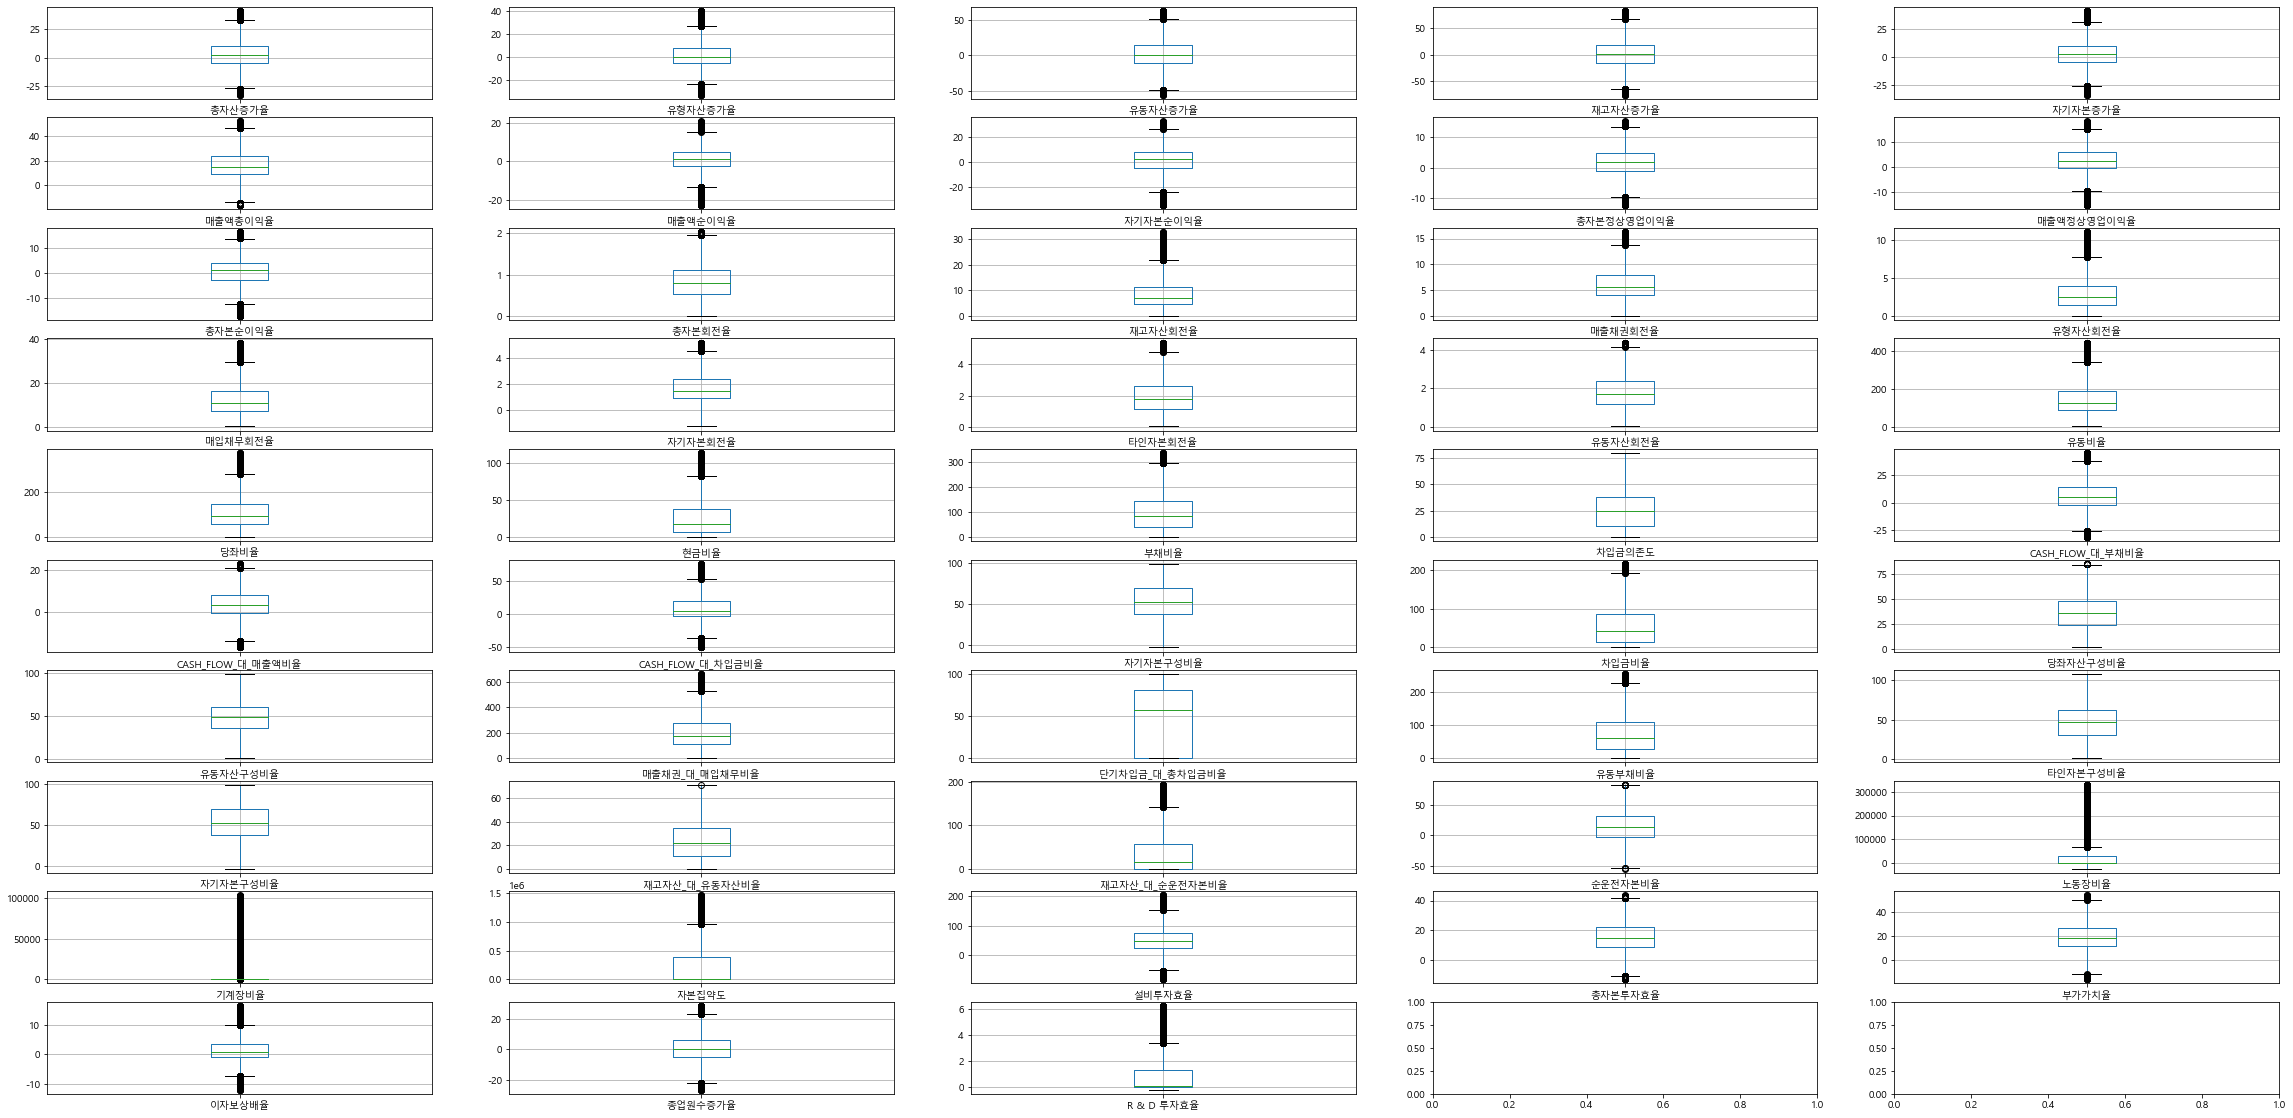

In [202]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(10, 5)
fig.set_size_inches((40,20))

total_df1_iqr.boxplot(column='총자산증가율', ax=axes[0,0])
total_df1_iqr.boxplot(column='유형자산증가율', ax=axes[0,1])
total_df1_iqr.boxplot(column='유동자산증가율', ax=axes[0,2])
total_df1_iqr.boxplot(column='재고자산증가율', ax=axes[0,3])
total_df1_iqr.boxplot(column='자기자본증가율', ax=axes[0,4])
total_df1_iqr.boxplot(column='매출액총이익율', ax=axes[1,0])
total_df1_iqr.boxplot(column='매출액순이익율', ax=axes[1,1])
total_df1_iqr.boxplot(column='자기자본순이익율', ax=axes[1,2])
total_df1_iqr.boxplot(column='총자본정상영업이익율', ax=axes[1,3])
total_df1_iqr.boxplot(column='매출액정상영업이익율', ax=axes[1,4])
total_df1_iqr.boxplot(column='총자본순이익율', ax=axes[2,0])
total_df1_iqr.boxplot(column='총자본회전율', ax=axes[2,1])
total_df1_iqr.boxplot(column='재고자산회전율', ax=axes[2,2])
total_df1_iqr.boxplot(column='매출채권회전율', ax=axes[2,3])
total_df1_iqr.boxplot(column='유형자산회전율', ax=axes[2,4])
total_df1_iqr.boxplot(column='매입채무회전율', ax=axes[3,0])
total_df1_iqr.boxplot(column='자기자본회전율', ax=axes[3,1])
total_df1_iqr.boxplot(column='타인자본회전율', ax=axes[3,2])
total_df1_iqr.boxplot(column='유동자산회전율', ax=axes[3,3])
total_df1_iqr.boxplot(column='유동비율', ax=axes[3,4])
total_df1_iqr.boxplot(column='당좌비율', ax=axes[4,0])
total_df1_iqr.boxplot(column='현금비율', ax=axes[4,1])
total_df1_iqr.boxplot(column='부채비율', ax=axes[4,2])
total_df1_iqr.boxplot(column='차입금의존도', ax=axes[4,3])
total_df1_iqr.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,4])
total_df1_iqr.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[5,0])
total_df1_iqr.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[5,1])
total_df1_iqr.boxplot(column='자기자본구성비율', ax=axes[5,2])
total_df1_iqr.boxplot(column='차입금비율', ax=axes[5,3])
total_df1_iqr.boxplot(column='당좌자산구성비율', ax=axes[5,4])
total_df1_iqr.boxplot(column='유동자산구성비율', ax=axes[6,0])
total_df1_iqr.boxplot(column='매출채권_대_매입채무비율', ax=axes[6,1])
total_df1_iqr.boxplot(column='단기차입금_대_총차입금비율', ax=axes[6,2])
total_df1_iqr.boxplot(column='유동부채비율', ax=axes[6,3])
total_df1_iqr.boxplot(column='타인자본구성비율', ax=axes[6,4])
total_df1_iqr.boxplot(column='자기자본구성비율', ax=axes[7,0])
total_df1_iqr.boxplot(column='재고자산_대_유동자산비율', ax=axes[7,1])
total_df1_iqr.boxplot(column='재고자산_대_순운전자본비율', ax=axes[7,2])
total_df1_iqr.boxplot(column='순운전자본비율', ax=axes[7,3])
total_df1_iqr.boxplot(column='노동장비율', ax=axes[7,4])
total_df1_iqr.boxplot(column='기계장비율', ax=axes[8,0])
total_df1_iqr.boxplot(column='자본집약도', ax=axes[8,1])
total_df1_iqr.boxplot(column='설비투자효율', ax=axes[8,2])
total_df1_iqr.boxplot(column='총자본투자효율', ax=axes[8,3])
total_df1_iqr.boxplot(column='부가가치율', ax=axes[8,4])
total_df1_iqr.boxplot(column='이자보상배율', ax=axes[9,0])
total_df1_iqr.boxplot(column='종업원수증가율', ax=axes[9,1])
total_df1_iqr.boxplot(column='R & D 투자효율', ax=axes[9,2])
# total_df1_iqr.boxplot(column='무형자산개발비비율', ax=axes[9,3])

plt.show()

In [ ]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(10, 5)
fig.set_size_inches((40,20))

stats.probplot(total_df1_iqr['총자산증가율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("총자산증가율")
stats.probplot(total_df1_iqr['유형자산증가율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("유형자산증가율")
stats.probplot(total_df1_iqr['유동자산증가율'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("유동자산증가율")
stats.probplot(total_df1_iqr['재고자산증가율'],dist=stats.norm,plot=axes[0,3])
axes[0,3].title.set_text("재고자산증가율")
stats.probplot(total_df1_iqr['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
axes[0,4].title.set_text("자기자본증가율")
stats.probplot(total_df1_iqr['매출액총이익율'],dist=stats.norm,plot=axes[1,0])
axes[1,0].title.set_text("매출액총이익율")
stats.probplot(total_df1_iqr['매출액순이익율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("매출액순이익율")
stats.probplot(total_df1_iqr['자기자본순이익율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("자기자본순이익율")
stats.probplot(total_df1_iqr['총자본정상영업이익율'],dist=stats.norm,plot=axes[1,3])
axes[1,3].title.set_text("총자본정상영업이익율")
stats.probplot(total_df1_iqr['매출액정상영업이익율'],dist=stats.norm,plot=axes[1,4])
axes[1,4].title.set_text("매출액정상영업이익율")
stats.probplot(total_df1_iqr['총자본순이익율'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("총자본순이익율")
stats.probplot(total_df1_iqr['총자본회전율'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("총자본회전율")
stats.probplot(total_df1_iqr['재고자산회전율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("재고자산회전율")
stats.probplot(total_df1_iqr['매출채권회전율'],dist=stats.norm,plot=axes[2,3])
axes[2,3].title.set_text("매출채권회전율")
stats.probplot(total_df1_iqr['유형자산회전율'],dist=stats.norm,plot=axes[2,4])
axes[2,4].title.set_text("유형자산회전율")
stats.probplot(total_df1_iqr['매입채무회전율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("매입채무회전율")
stats.probplot(total_df1_iqr['자기자본회전율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("자기자본회전율")
stats.probplot(total_df1_iqr['타인자본회전율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("타인자본회전율")
stats.probplot(total_df1_iqr['유동자산회전율'],dist=stats.norm,plot=axes[3,3])
axes[3,3].title.set_text("유동자산회전율")
stats.probplot(total_df1_iqr['유동비율'],dist=stats.norm,plot=axes[3,4])
axes[3,4].title.set_text("유동비율")
stats.probplot(total_df1_iqr['당좌비율'],dist=stats.norm,plot=axes[4,0])
axes[4,0].title.set_text("당좌비율")
stats.probplot(total_df1_iqr['현금비율'],dist=stats.norm,plot=axes[4,1])
axes[4,1].title.set_text("현금비율")
stats.probplot(total_df1_iqr['부채비율'],dist=stats.norm,plot=axes[4,2])
axes[4,2].title.set_text("부채비율")
stats.probplot(total_df1_iqr['차입금의존도'],dist=stats.norm,plot=axes[4,3])
axes[4,3].title.set_text("차입금의존도")
stats.probplot(total_df1_iqr['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[4,4])
axes[4,4].title.set_text("CASH_FLOW_대_부채비율")
stats.probplot(total_df1_iqr['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,0])
axes[5,0].title.set_text("CASH_FLOW_대_매출액비율")
stats.probplot(total_df1_iqr['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,1])
axes[5,1].title.set_text("CASH_FLOW_대_차입금비율")
stats.probplot(total_df1_iqr['자기자본구성비율'],dist=stats.norm,plot=axes[5,2])
axes[5,2].title.set_text("자기자본구성비율")
stats.probplot(total_df1_iqr['차입금비율'],dist=stats.norm,plot=axes[5,3])
axes[5,3].title.set_text("차입금비율")
stats.probplot(total_df1_iqr['당좌자산구성비율'],dist=stats.norm,plot=axes[5,4])
axes[5,4].title.set_text("당좌자산구성비율")
stats.probplot(total_df1_iqr['유동자산구성비율'],dist=stats.norm,plot=axes[6,0])
axes[6,0].title.set_text("유동자산구성비율")
stats.probplot(total_df1_iqr['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,1])
axes[6,1].title.set_text("매출채권_대_매입채무비율")
stats.probplot(total_df1_iqr['단기차입금_대_총차입금비율'],dist=stats.norm,plot=axes[6,2])
axes[6,2].title.set_text("단기차입금_대_총차입금비율")
stats.probplot(total_df1_iqr['유동부채비율'],dist=stats.norm,plot=axes[6,3])
axes[6,3].title.set_text("유동부채비율")
stats.probplot(total_df1_iqr['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
axes[6,4].title.set_text("타인자본구성비율")
stats.probplot(total_df1_iqr['자기자본구성비율'],dist=stats.norm,plot=axes[7,0])
axes[7,0].title.set_text("자기자본구성비율")
stats.probplot(total_df1_iqr['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,1])
axes[7,1].title.set_text("재고자산_대_유동자산비율")
stats.probplot(total_df1_iqr['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,2])
axes[7,2].title.set_text("재고자산_대_순운전자본비율")
stats.probplot(total_df1_iqr['순운전자본비율'],dist=stats.norm,plot=axes[7,3])
axes[7,3].title.set_text("순운전자본비율")
stats.probplot(total_df1_iqr['노동장비율'],dist=stats.norm,plot=axes[7,4])
axes[7,4].title.set_text("노동장비율")
stats.probplot(total_df1_iqr['기계장비율'],dist=stats.norm,plot=axes[8,0])
axes[8,0].title.set_text("기계장비율")
stats.probplot(total_df1_iqr['자본집약도'],dist=stats.norm,plot=axes[8,1])
axes[8,1].title.set_text("자본집약도")
stats.probplot(total_df1_iqr['설비투자효율'],dist=stats.norm,plot=axes[8,2])
axes[8,2].title.set_text("설비투자효율")
stats.probplot(total_df1_iqr['총자본투자효율'],dist=stats.norm,plot=axes[8,3])
axes[8,3].title.set_text("총자본투자효율")
stats.probplot(total_df1_iqr['부가가치율'],dist=stats.norm,plot=axes[8,4])
axes[8,4].title.set_text("부가가치율")
stats.probplot(total_df1_iqr['이자보상배율'],dist=stats.norm,plot=axes[9,0])
axes[9,0].title.set_text("이자보상배율")
stats.probplot(total_df1_iqr['종업원수증가율'],dist=stats.norm,plot=axes[9,1])
axes[9,1].title.set_text("종업원수증가율")
stats.probplot(total_df1_iqr['R & D 투자효율'],dist=stats.norm,plot=axes[9,2])
axes[9,2].title.set_text("R & D 투자효율")
# stats.probplot(total_df1_iqr['무형자산개발비비율'],dist=stats.norm,plot=axes[9,3])
# axes[9,3].title.set_text("무형자산개발비비율")

plt.show()

### 윈저라이징하기

In [153]:
from scipy.stats.mstats import winsorize
df1 = df.iloc[:,3:].copy()
for col in df1.columns:
     df1[col] = winsorize(df1[col], limits= 0.01)

In [154]:
# from scipy.stats.mstats import winsorize
# # option 1a:
# for v in range(len(df)):
#     df.loc[v]['총자산증가율'] = winsorize(df.loc[v]['총자산증가율'],limits=[.05,.95])
#     df.loc[v]['유형자산증가율'] = winsorize(df.loc[v]['유형자산증가율'],limits=[.05,.95])
#     df.loc[v]['유동자산증가율'] = winsorize(df.loc[v]['유동자산증가율'],limits=[.05,.95])
#     df.loc[v]['재고자산증가율'] = winsorize(df.loc[v]['재고자산증가율'],limits=[.05,.95])
#     df.loc[v]['자기자본증가율'] = winsorize(df.loc[v]['자기자본증가율'],limits=[.05,.95])
#     df.loc[v]['매출액총이익율'] = winsorize(df.loc[v]['매출액총이익율'],limits=[.05,.95])
#     df.loc[v]['매출액순이익율'] = winsorize(df.loc[v]['매출액순이익율'],limits=[.05,.95])
#     df.loc[v]['자기자본순이익율'] = winsorize(df.loc[v]['자기자본순이익율'],limits=[.05,.95])
#     df.loc[v]['총자본정상영업이익율'] = winsorize(df.loc[v]['총자본정상영업이익율'],limits=[.05,.95])
#     df.loc[v]['매출액정상영업이익율'] = winsorize(df.loc[v]['매출액정상영업이익율'],limits=[.05,.95])
#     df.loc[v]['총자본순이익율'] = winsorize(df.loc[v]['총자본순이익율'],limits=[.05,.95])
#     df.loc[v]['총자본회전율'] = winsorize(df.loc[v]['총자본회전율'],limits=[.05,.95])
#     df.loc[v]['재고자산회전율'] = winsorize(df.loc[v]['재고자산회전율'],limits=[.05,.95])
#     df.loc[v]['매출채권회전율'] = winsorize(df.loc[v]['매출채권회전율'],limits=[.05,.95])
#     df.loc[v]['유형자산회전율'] = winsorize(df.loc[v]['유형자산회전율'],limits=[.05,.95])
#     df.loc[v]['매입채무회전율'] = winsorize(df.loc[v]['매입채무회전율'],limits=[.05,.95])
#     df.loc[v]['자기자본회전율'] = winsorize(df.loc[v]['자기자본회전율'],limits=[.05,.95])
#     df.loc[v]['타인자본회전율'] = winsorize(df.loc[v]['타인자본회전율'],limits=[.05,.95])
#     df.loc[v]['유동자산회전율'] = winsorize(df.loc[v]['유동자산회전율'],limits=[.05,.95])
#     df.loc[v]['유동비율'] = winsorize(df.loc[v]['유동비율'],limits=[.05,.95])
#     df.loc[v]['당좌비율'] = winsorize(df.loc[v]['당좌비율'],limits=[.05,.95])
#     df.loc[v]['현금비율'] = winsorize(df.loc[v]['현금비율'],limits=[.05,.95])
#     df.loc[v]['부채비율'] = winsorize(df.loc[v]['부채비율'],limits=[.05,.95])
#     df.loc[v]['차입금의존도'] = winsorize(df.loc[v]['차입금의존도'],limits=[.05,.95])
#     df.loc[v]['CASH_FLOW_대_부채비율'] = winsorize(df.loc[v]['CASH_FLOW_대_부채비율'],limits=[.05,.95])
#     df.loc[v]['CASH_FLOW_대_매출액비율'] = winsorize(df.loc[v]['CASH_FLOW_대_매출액비율'],limits=[.05,.95])
#     df.loc[v]['CASH_FLOW_대_차입금비율'] = winsorize(df.loc[v]['CASH_FLOW_대_차입금비율'],limits=[.05,.95])
#     df.loc[v]['자기자본구성비율'] = winsorize(df.loc[v]['자기자본구성비율'],limits=[.05,.95])
#     df.loc[v]['차입금비율'] = winsorize(df.loc[v]['차입금비율'],limits=[.05,.95])
#     df.loc[v]['당좌자산구성비율'] = winsorize(df.loc[v]['당좌자산구성비율'],limits=[.05,.95])
#     df.loc[v]['유동자산구성비율'] = winsorize(df.loc[v]['유동자산구성비율'],limits=[.05,.95])
#     df.loc[v]['매출채권_대_매입채무비율'] = winsorize(df.loc[v]['매출채권_대_매입채무비율'],limits=[.05,.95])
#     df.loc[v]['단기차입금_대_총차입금비율'] = winsorize(df.loc[v]['단기차입금_대_총차입금비율'],limits=[.05,.95])
#     df.loc[v]['유동부채비율'] = winsorize(df.loc[v]['유동부채비율'],limits=[.05,.95])
#     df.loc[v]['타인자본구성비율'] = winsorize(df.loc[v]['타인자본구성비율'],limits=[.05,.95])
#     df.loc[v]['자기자본구성비율'] = winsorize(df.loc[v]['자기자본구성비율'],limits=[.05,.95])
#     df.loc[v]['재고자산_대_유동자산비율'] = winsorize(df.loc[v]['재고자산_대_유동자산비율'],limits=[.05,.95])
#     df.loc[v]['재고자산_대_순운전자본비율'] = winsorize(df.loc[v]['재고자산_대_순운전자본비율'],limits=[.05,.95])
#     df.loc[v]['순운전자본비율'] = winsorize(df.loc[v]['순운전자본비율'],limits=[.05,.95])
#     df.loc[v]['노동장비율'] = winsorize(df.loc[v]['노동장비율'],limits=[.05,.95])
#     df.loc[v]['기계장비율'] = winsorize(df.loc[v]['기계장비율'],limits=[.05,.95])
#     df.loc[v]['자본집약도'] = winsorize(df.loc[v]['자본집약도'],limits=[.05,.95])
#     df.loc[v]['설비투자효율'] = winsorize(df.loc[v]['설비투자효율'],limits=[.05,.95])
#     df.loc[v]['총자본투자효율'] = winsorize(df.loc[v]['총자본투자효율'],limits=[.05,.95])
#     df.loc[v]['부가가치율'] = winsorize(df.loc[v]['부가가치율'],limits=[.05,.95])
#     df.loc[v]['종업원수증가율'] = winsorize(df.loc[v]['종업원수증가율'],limits=[.05,.95])
#     df.loc[v]['R & D 투자효율'] = winsorize(df.loc[v]['R & D 투자효율'],limits=[.05,.95])
#     df.loc[v]['이자보상배율'] = winsorize(df.loc[v]['이자보상배율'],limits=[.05,.95])

### 윈저 후 다시 보기

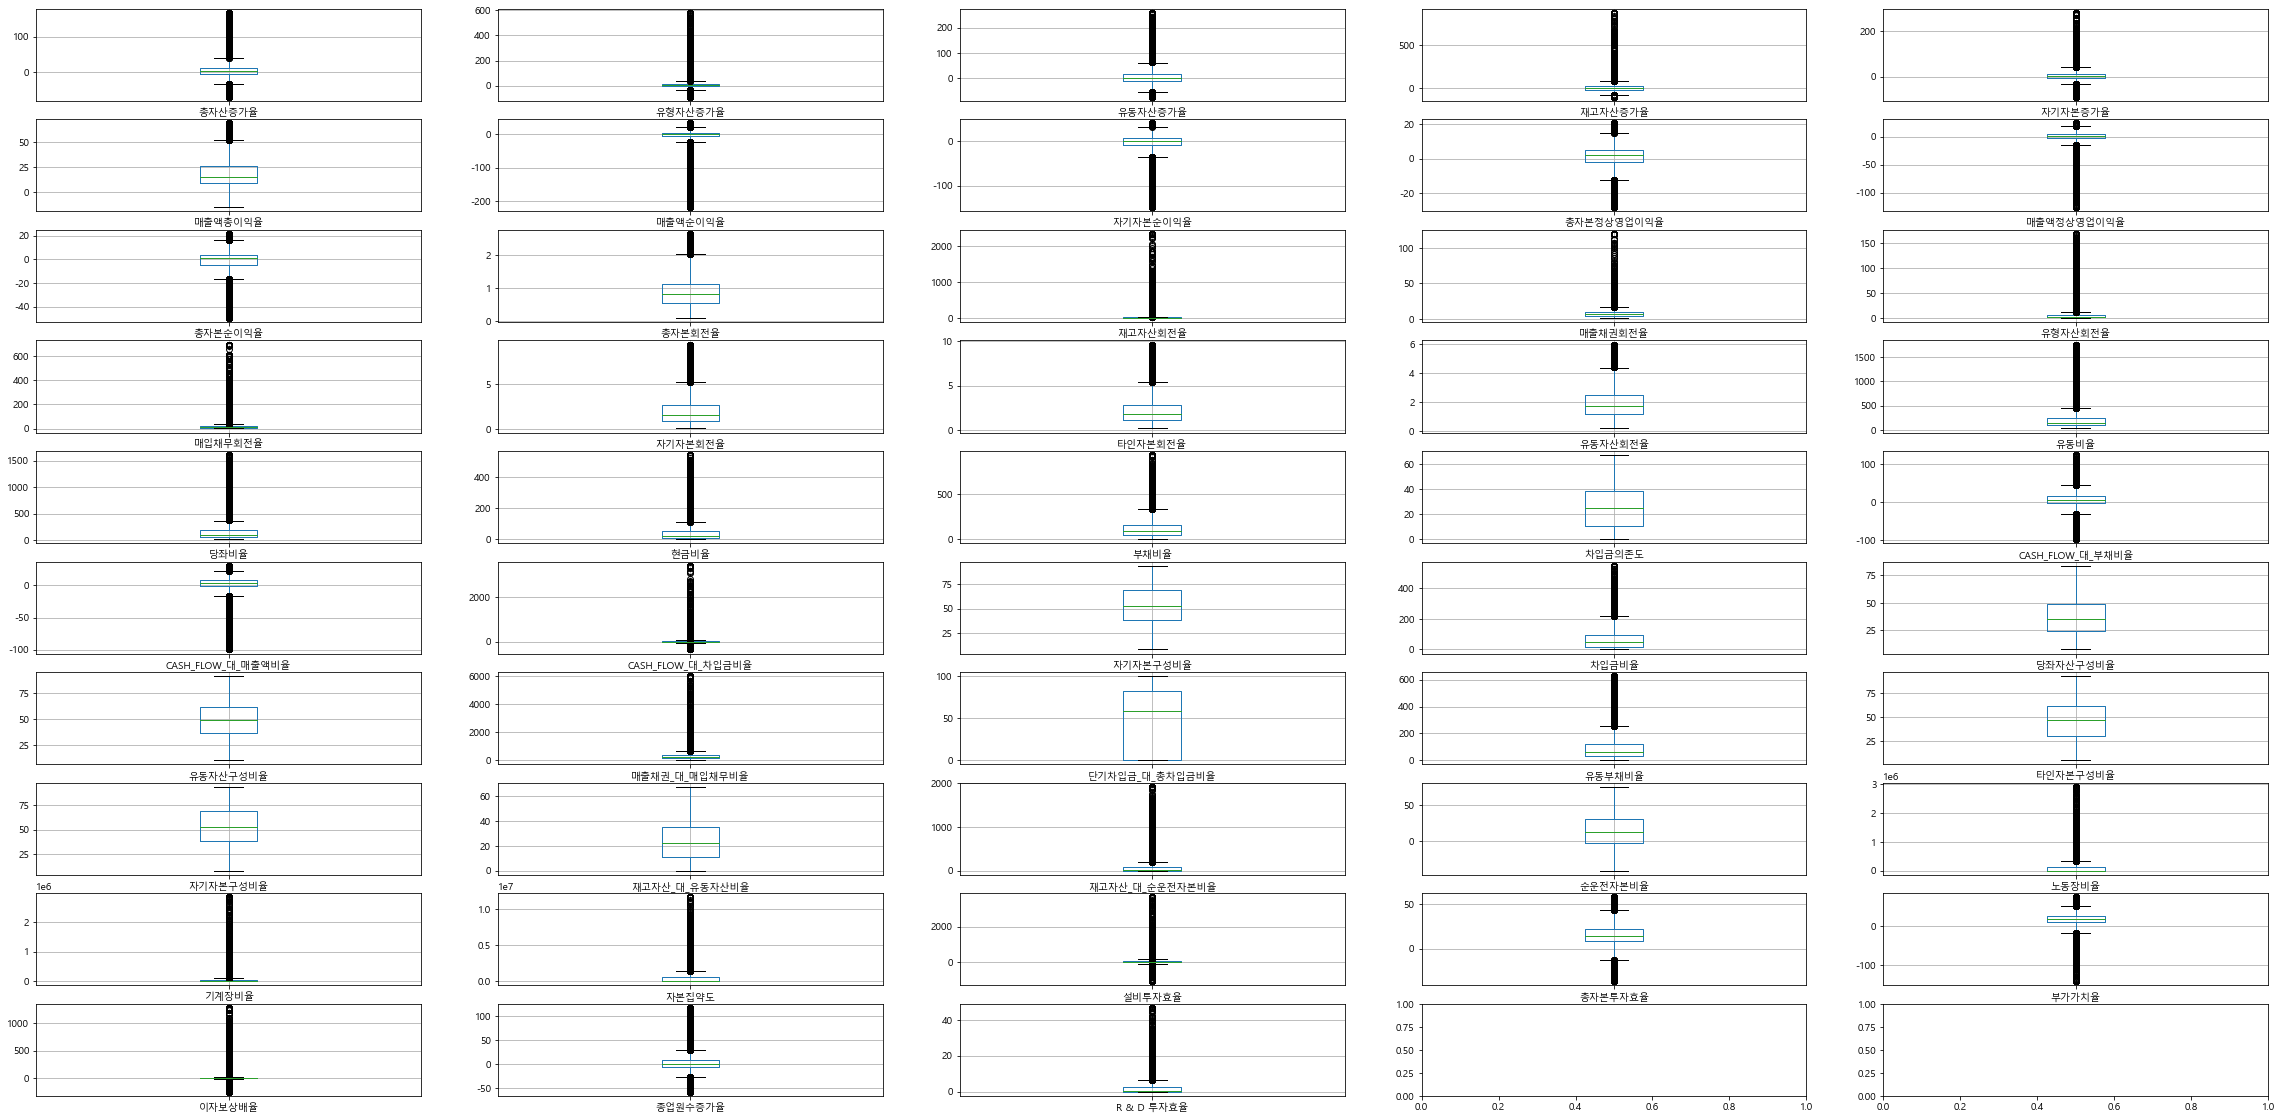

In [155]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(10, 5)
fig.set_size_inches((40,20))

df1.boxplot(column='총자산증가율', ax=axes[0,0])
df1.boxplot(column='유형자산증가율', ax=axes[0,1])
df1.boxplot(column='유동자산증가율', ax=axes[0,2])
df1.boxplot(column='재고자산증가율', ax=axes[0,3])
df1.boxplot(column='자기자본증가율', ax=axes[0,4])
df1.boxplot(column='매출액총이익율', ax=axes[1,0])
df1.boxplot(column='매출액순이익율', ax=axes[1,1])
df1.boxplot(column='자기자본순이익율', ax=axes[1,2])
df1.boxplot(column='총자본정상영업이익율', ax=axes[1,3])
df1.boxplot(column='매출액정상영업이익율', ax=axes[1,4])
df1.boxplot(column='총자본순이익율', ax=axes[2,0])
df1.boxplot(column='총자본회전율', ax=axes[2,1])
df1.boxplot(column='재고자산회전율', ax=axes[2,2])
df1.boxplot(column='매출채권회전율', ax=axes[2,3])
df1.boxplot(column='유형자산회전율', ax=axes[2,4])
df1.boxplot(column='매입채무회전율', ax=axes[3,0])
df1.boxplot(column='자기자본회전율', ax=axes[3,1])
df1.boxplot(column='타인자본회전율', ax=axes[3,2])
df1.boxplot(column='유동자산회전율', ax=axes[3,3])
df1.boxplot(column='유동비율', ax=axes[3,4])
df1.boxplot(column='당좌비율', ax=axes[4,0])
df1.boxplot(column='현금비율', ax=axes[4,1])
df1.boxplot(column='부채비율', ax=axes[4,2])
df1.boxplot(column='차입금의존도', ax=axes[4,3])
df1.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,4])
df1.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[5,0])
df1.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[5,1])
df1.boxplot(column='자기자본구성비율', ax=axes[5,2])
df1.boxplot(column='차입금비율', ax=axes[5,3])
df1.boxplot(column='당좌자산구성비율', ax=axes[5,4])
df1.boxplot(column='유동자산구성비율', ax=axes[6,0])
df1.boxplot(column='매출채권_대_매입채무비율', ax=axes[6,1])
df1.boxplot(column='단기차입금_대_총차입금비율', ax=axes[6,2])
df1.boxplot(column='유동부채비율', ax=axes[6,3])
df1.boxplot(column='타인자본구성비율', ax=axes[6,4])
df1.boxplot(column='자기자본구성비율', ax=axes[7,0])
df1.boxplot(column='재고자산_대_유동자산비율', ax=axes[7,1])
df1.boxplot(column='재고자산_대_순운전자본비율', ax=axes[7,2])
df1.boxplot(column='순운전자본비율', ax=axes[7,3])
df1.boxplot(column='노동장비율', ax=axes[7,4])
df1.boxplot(column='기계장비율', ax=axes[8,0])
df1.boxplot(column='자본집약도', ax=axes[8,1])
df1.boxplot(column='설비투자효율', ax=axes[8,2])
df1.boxplot(column='총자본투자효율', ax=axes[8,3])
df1.boxplot(column='부가가치율', ax=axes[8,4])
df1.boxplot(column='이자보상배율', ax=axes[9,0])
df1.boxplot(column='종업원수증가율', ax=axes[9,1])
df1.boxplot(column='R & D 투자효율', ax=axes[9,2])
# df1.boxplot(column='무형자산개발비비율', ax=axes[9,3])

plt.show()

### 언놈이 나를 힘들게 하는지 확인하기

In [156]:
# 이상치 인덱스

q1 = df['총자산증가율'].quantile(0.25)
q3 = df['총자산증가율'].quantile(0.75)
iqr = q3-q1

condition1 = df['총자산증가율']>q3+1.5*iqr
condition2 = df['총자산증가율']<q1-1.5*iqr
a = df[condition1].index
b = df[condition2].index

print(a)
print(b)

Int64Index([   1,    5,    8,   23,   26,   42,   73,   75,   76,   77,
            ...
            8803, 8826, 8843, 8858, 8861, 8904, 8943, 9035, 9043, 9044],
           dtype='int64', length=717)
Int64Index([  18,   34,   39,   85,   93,  101,  117,  121,  127,  158,
            ...
            8769, 8794, 8821, 8825, 8889, 8891, 8966, 8975, 9002, 9045],
           dtype='int64', length=322)


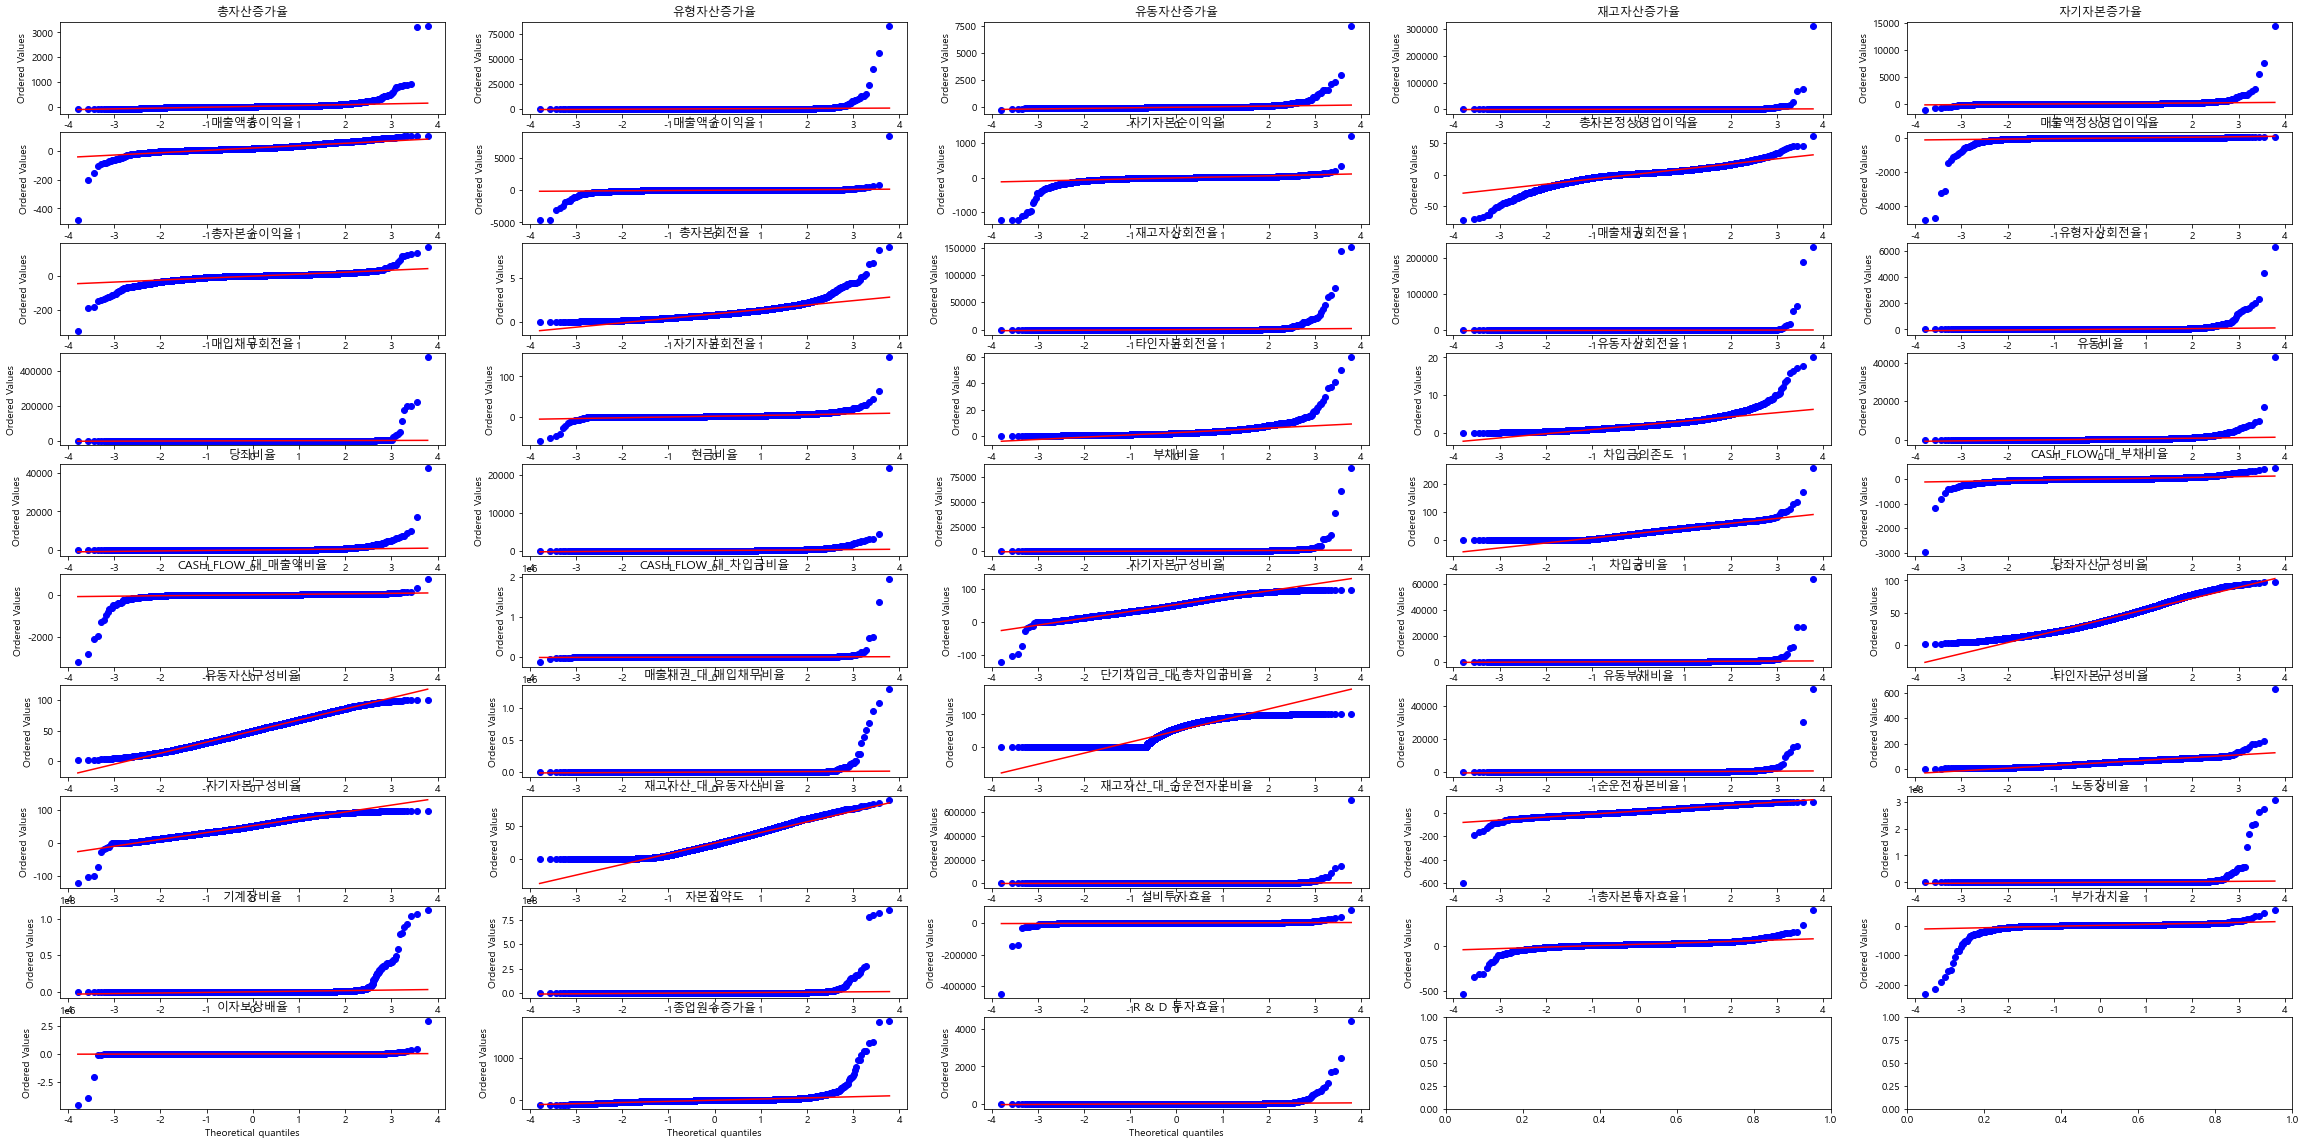

In [157]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(10, 5)
fig.set_size_inches((40,20))

stats.probplot(df['총자산증가율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("총자산증가율")
stats.probplot(df['유형자산증가율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("유형자산증가율")
stats.probplot(df['유동자산증가율'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("유동자산증가율")
stats.probplot(df['재고자산증가율'],dist=stats.norm,plot=axes[0,3])
axes[0,3].title.set_text("재고자산증가율")
stats.probplot(df['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
axes[0,4].title.set_text("자기자본증가율")
stats.probplot(df['매출액총이익율'],dist=stats.norm,plot=axes[1,0])
axes[1,0].title.set_text("매출액총이익율")
stats.probplot(df['매출액순이익율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("매출액순이익율")
stats.probplot(df['자기자본순이익율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("자기자본순이익율")
stats.probplot(df['총자본정상영업이익율'],dist=stats.norm,plot=axes[1,3])
axes[1,3].title.set_text("총자본정상영업이익율")
stats.probplot(df['매출액정상영업이익율'],dist=stats.norm,plot=axes[1,4])
axes[1,4].title.set_text("매출액정상영업이익율")
stats.probplot(df['총자본순이익율'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("총자본순이익율")
stats.probplot(df['총자본회전율'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("총자본회전율")
stats.probplot(df['재고자산회전율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("재고자산회전율")
stats.probplot(df['매출채권회전율'],dist=stats.norm,plot=axes[2,3])
axes[2,3].title.set_text("매출채권회전율")
stats.probplot(df['유형자산회전율'],dist=stats.norm,plot=axes[2,4])
axes[2,4].title.set_text("유형자산회전율")
stats.probplot(df['매입채무회전율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("매입채무회전율")
stats.probplot(df['자기자본회전율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("자기자본회전율")
stats.probplot(df['타인자본회전율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("타인자본회전율")
stats.probplot(df['유동자산회전율'],dist=stats.norm,plot=axes[3,3])
axes[3,3].title.set_text("유동자산회전율")
stats.probplot(df['유동비율'],dist=stats.norm,plot=axes[3,4])
axes[3,4].title.set_text("유동비율")
stats.probplot(df['당좌비율'],dist=stats.norm,plot=axes[4,0])
axes[4,0].title.set_text("당좌비율")
stats.probplot(df['현금비율'],dist=stats.norm,plot=axes[4,1])
axes[4,1].title.set_text("현금비율")
stats.probplot(df['부채비율'],dist=stats.norm,plot=axes[4,2])
axes[4,2].title.set_text("부채비율")
stats.probplot(df['차입금의존도'],dist=stats.norm,plot=axes[4,3])
axes[4,3].title.set_text("차입금의존도")
stats.probplot(df['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[4,4])
axes[4,4].title.set_text("CASH_FLOW_대_부채비율")
stats.probplot(df['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,0])
axes[5,0].title.set_text("CASH_FLOW_대_매출액비율")
stats.probplot(df['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,1])
axes[5,1].title.set_text("CASH_FLOW_대_차입금비율")
stats.probplot(df['자기자본구성비율'],dist=stats.norm,plot=axes[5,2])
axes[5,2].title.set_text("자기자본구성비율")
stats.probplot(df['차입금비율'],dist=stats.norm,plot=axes[5,3])
axes[5,3].title.set_text("차입금비율")
stats.probplot(df['당좌자산구성비율'],dist=stats.norm,plot=axes[5,4])
axes[5,4].title.set_text("당좌자산구성비율")
stats.probplot(df['유동자산구성비율'],dist=stats.norm,plot=axes[6,0])
axes[6,0].title.set_text("유동자산구성비율")
stats.probplot(df['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,1])
axes[6,1].title.set_text("매출채권_대_매입채무비율")
stats.probplot(df['단기차입금_대_총차입금비율'],dist=stats.norm,plot=axes[6,2])
axes[6,2].title.set_text("단기차입금_대_총차입금비율")
stats.probplot(df['유동부채비율'],dist=stats.norm,plot=axes[6,3])
axes[6,3].title.set_text("유동부채비율")
stats.probplot(df['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
axes[6,4].title.set_text("타인자본구성비율")
stats.probplot(df['자기자본구성비율'],dist=stats.norm,plot=axes[7,0])
axes[7,0].title.set_text("자기자본구성비율")
stats.probplot(df['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,1])
axes[7,1].title.set_text("재고자산_대_유동자산비율")
stats.probplot(df['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,2])
axes[7,2].title.set_text("재고자산_대_순운전자본비율")
stats.probplot(df['순운전자본비율'],dist=stats.norm,plot=axes[7,3])
axes[7,3].title.set_text("순운전자본비율")
stats.probplot(df['노동장비율'],dist=stats.norm,plot=axes[7,4])
axes[7,4].title.set_text("노동장비율")
stats.probplot(df['기계장비율'],dist=stats.norm,plot=axes[8,0])
axes[8,0].title.set_text("기계장비율")
stats.probplot(df['자본집약도'],dist=stats.norm,plot=axes[8,1])
axes[8,1].title.set_text("자본집약도")
stats.probplot(df['설비투자효율'],dist=stats.norm,plot=axes[8,2])
axes[8,2].title.set_text("설비투자효율")
stats.probplot(df['총자본투자효율'],dist=stats.norm,plot=axes[8,3])
axes[8,3].title.set_text("총자본투자효율")
stats.probplot(df['부가가치율'],dist=stats.norm,plot=axes[8,4])
axes[8,4].title.set_text("부가가치율")
stats.probplot(df['이자보상배율'],dist=stats.norm,plot=axes[9,0])
axes[9,0].title.set_text("이자보상배율")
stats.probplot(df['종업원수증가율'],dist=stats.norm,plot=axes[9,1])
axes[9,1].title.set_text("종업원수증가율")
stats.probplot(df['R & D 투자효율'],dist=stats.norm,plot=axes[9,2])
axes[9,2].title.set_text("R & D 투자효율")
# stats.probplot(df['무형자산개발비비율'],dist=stats.norm,plot=axes[9,3])
# axes[9,3].title.set_text("무형자산개발비비율")

plt.show()

In [158]:
# cols = []

# total_df2_iqr = total_df1_iqr.copy()
# total_df2_iqr = total_df2_iqr[['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
#        '재고자산증가율', '자기자본증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본정상영업이익율',
#        '매출액정상영업이익율', '총자본순이익율', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
#        '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '유동비율', '당좌비율', '현금비율',
#        '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
#        'CASH_FLOW_대_차입금비율', '자기자본구성비율', '차입금비율', '당좌자산구성비율', '유동자산구성비율',
#        '매출채권_대_매입채무비율', '단기차입금_대_총차입금비율', '유동부채비율', '타인자본구성비율',
#        '재고자산_대_유동자산비율', '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도',
#        '설비투자효율', '총자본투자효율', '부가가치율', '종업원수증가율', 'R & D 투자효율', '직원감소율여부']]
# cols.append([col for col in total_df2_iqr])

# Q1 = total_df2_iqr[['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
#        '재고자산증가율', '자기자본증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본정상영업이익율',
#        '매출액정상영업이익율', '총자본순이익율', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
#        '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '유동비율', '당좌비율', '현금비율',
#        '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
#        'CASH_FLOW_대_차입금비율', '자기자본구성비율', '차입금비율', '당좌자산구성비율', '유동자산구성비율',
#        '매출채권_대_매입채무비율', '단기차입금_대_총차입금비율', '유동부채비율', '타인자본구성비율',
#        '재고자산_대_유동자산비율', '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도',
#        '설비투자효율', '총자본투자효율', '부가가치율', '종업원수증가율', 'R & D 투자효율', '직원감소율여부']].quantile(q=0.25)

# Q3 = total_df2_iqr[['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
#        '재고자산증가율', '자기자본증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본정상영업이익율',
#        '매출액정상영업이익율', '총자본순이익율', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
#        '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '유동비율', '당좌비율', '현금비율',
#        '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
#        'CASH_FLOW_대_차입금비율', '자기자본구성비율', '차입금비율', '당좌자산구성비율', '유동자산구성비율',
#        '매출채권_대_매입채무비율', '단기차입금_대_총차입금비율', '유동부채비율', '타인자본구성비율',
#        '재고자산_대_유동자산비율', '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도',
#        '설비투자효율', '총자본투자효율', '부가가치율', '종업원수증가율', 'R & D 투자효율', '직원감소율여부']].quantile(q=0.75)

# IQR = Q3 - Q1
# for i in cols:
#     total_df2_iqr[i] = total_df2_iqr[i][(total_df2_iqr[i] <= Q3[i]+1.5*IQR[i]) & (total_df2_iqr[i] >= Q1[i]-1.5*IQR[i])]

In [159]:
# # 이상치 박스플롯
# from matplotlib.pyplot import imread

# fig, axes = plt.subplots(10, 5)
# fig.set_size_inches((40,35))

# total_df2_iqr.boxplot(column='총자산증가율', ax=axes[0,0])
# total_df2_iqr.boxplot(column='유형자산증가율', ax=axes[0,1])
# total_df2_iqr.boxplot(column='유동자산증가율', ax=axes[0,2])
# total_df2_iqr.boxplot(column='재고자산증가율', ax=axes[0,3])
# total_df2_iqr.boxplot(column='자기자본증가율', ax=axes[0,4])
# total_df2_iqr.boxplot(column='매출액총이익율', ax=axes[1,1])
# total_df2_iqr.boxplot(column='매출액순이익율', ax=axes[1,2])
# total_df2_iqr.boxplot(column='자기자본순이익율', ax=axes[1,3])
# total_df2_iqr.boxplot(column='총자본정상영업이익율', ax=axes[1,4])
# total_df2_iqr.boxplot(column='매출액정상영업이익율', ax=axes[2,0])
# total_df2_iqr.boxplot(column='총자본순이익율', ax=axes[2,1])
# total_df2_iqr.boxplot(column='총자본회전율', ax=axes[2,2])
# total_df2_iqr.boxplot(column='재고자산회전율', ax=axes[2,3])
# total_df2_iqr.boxplot(column='매출채권회전율', ax=axes[2,4])
# total_df2_iqr.boxplot(column='유형자산회전율', ax=axes[3,0])
# total_df2_iqr.boxplot(column='매입채무회전율', ax=axes[3,1])
# total_df2_iqr.boxplot(column='자기자본회전율', ax=axes[3,2])
# total_df2_iqr.boxplot(column='타인자본회전율', ax=axes[3,3])
# total_df2_iqr.boxplot(column='유동자산회전율', ax=axes[3,4])
# total_df2_iqr.boxplot(column='유동비율', ax=axes[4,0])
# total_df2_iqr.boxplot(column='당좌비율', ax=axes[4,1])
# total_df2_iqr.boxplot(column='현금비율', ax=axes[4,2])
# total_df2_iqr.boxplot(column='부채비율', ax=axes[4,3])
# total_df2_iqr.boxplot(column='차입금의존도', ax=axes[4,4])
# total_df2_iqr.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[5,0])
# total_df2_iqr.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[5,1])
# total_df2_iqr.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[5,2])
# total_df2_iqr.boxplot(column='자기자본구성비율', ax=axes[5,3])
# total_df2_iqr.boxplot(column='차입금비율', ax=axes[5,4])
# total_df2_iqr.boxplot(column='당좌자산구성비율', ax=axes[6,0])
# total_df2_iqr.boxplot(column='유동자산구성비율', ax=axes[6,1])
# total_df2_iqr.boxplot(column='매출채권_대_매입채무비율', ax=axes[6,2])
# total_df2_iqr.boxplot(column='단기차입금_대_총차입금비율', ax=axes[6,3])
# total_df2_iqr.boxplot(column='유동부채비율', ax=axes[6,4])
# total_df2_iqr.boxplot(column='타인자본구성비율', ax=axes[7,0])
# total_df2_iqr.boxplot(column='자기자본구성비율', ax=axes[7,1])
# total_df2_iqr.boxplot(column='재고자산_대_유동자산비율', ax=axes[7,2])
# total_df2_iqr.boxplot(column='재고자산_대_순운전자본비율', ax=axes[7,3])
# total_df2_iqr.boxplot(column='순운전자본비율', ax=axes[7,4])
# total_df2_iqr.boxplot(column='노동장비율', ax=axes[8,0])
# total_df2_iqr.boxplot(column='기계장비율', ax=axes[8,1])
# total_df2_iqr.boxplot(column='자본집약도', ax=axes[8,2])
# total_df2_iqr.boxplot(column='설비투자효율', ax=axes[8,3])
# total_df2_iqr.boxplot(column='총자본투자효율', ax=axes[8,4])
# total_df2_iqr.boxplot(column='부가가치율', ax=axes[9,0])
# total_df2_iqr.boxplot(column='이자보상배율', ax=axes[9,1])

# plt.show()

In [160]:
df1.columns

Index(['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율', '재고자산증가율', '자기자본증가율',
       '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본정상영업이익율', '매출액정상영업이익율', '총자본순이익율',
       '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율', '매입채무회전율', '자기자본회전율',
       '타인자본회전율', '유동자산회전율', '유동비율', '당좌비율', '현금비율', '부채비율', '차입금의존도',
       'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율', 'CASH_FLOW_대_차입금비율',
       '자기자본구성비율', '차입금비율', '당좌자산구성비율', '유동자산구성비율', '매출채권_대_매입채무비율',
       '단기차입금_대_총차입금비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원수증가율', 'R & D 투자효율', '직원감소율여부'],
      dtype='object')

### 일단 정규화를 해야 할까요?

In [161]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
SS = StandardScaler()
RS = RobustScaler()
ss_sc = SS.fit_transform(df1)
# ss_sc_iqr = SS.fit_transform(df)
ss_sc2 = pd.DataFrame(ss_sc)
# ss_sc_iqr = pd.DataFrame(ss_sc_iqr)
rs_sc = RS.fit_transform(df1)
# rs_sc_iqr = RS.fit_transform(df)
rs_sc2 = pd.DataFrame(rs_sc)
# rs_sc_iqr2 = pd.DataFrame(rs_sc_iqr)

In [162]:
df1

,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,재고자산증가율,자기자본증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본정상영업이익율,...,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원수증가율,R & D 투자효율,직원감소율여부
0,3.53,1.98,-5.90,17.64,-1.43,-2.02,41.83,-8.50,-8.28,2.37,...,28.23,71.32,19.75,204.06,35.86,12.72,19.56,4.65,0.13,0
1,-7.75,109.15,-4.12,207.08,7.73,75.17,28.34,-40.97,-26.84,-9.96,...,70.60,69.14,18.64,425.29,2.89,0.47,1.66,-0.74,0.74,0
2,0.70,-2.09,16.09,-18.89,56.29,55.10,38.70,1.45,0.74,1.40,...,58.50,66.01,17.77,411.48,77.91,12.51,34.29,1.49,0.66,0
3,3.60,3.86,74.30,-25.93,6.37,0.01,37.07,0.69,0.32,0.78,...,33.72,113.90,32.60,354.43,37.80,12.16,31.04,20.59,0.51,1
4,-32.22,-2.64,-5.37,-7.17,11.04,-4.48,36.26,-13.50,-7.62,-4.49,...,30.82,114.25,30.43,362.77,24.21,7.63,15.96,-4.88,3.08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9059,1.12,13.69,45.19,-13.68,-8.50,7.76,5.61,2.22,11.37,3.04,...,-12.59,423.67,15.32,831.53,27.88,13.89,10.93,9.90,0.00,0
9060,1.02,21.93,49.36,-11.18,-12.92,3.39,6.20,1.24,6.18,2.95,...,-15.94,589.65,14.23,948.60,21.49,13.11,12.28,7.68,0.00,0
9061,0.21,21.08,38.84,-25.08,56.39,11.22,4.49,-2.06,-9.40,0.67,...,-16.34,703.55,12.28,1000.62,15.81,10.98,12.66,15.87,0.00,0
9062,-0.42,-11.43,-16.50,13.29,11.18,-39.28,2.09,-8.79,-47.52,-1.45,...,-24.48,599097.86,12.56,921779.07,8.35,5.43,5.51,-2.23,0.00,0


In [163]:
ss_sc2

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-0.141071,-0.185513,-0.277127,0.177373,-0.189141,-0.255751,1.424658,-0.014561,-0.096467,0.182765,...,0.550966,-0.372537,-0.303228,-0.375688,-0.215324,-0.136795,0.121383,0.113026,-0.396836,-0.294857
1,-0.211866,3.327022,-0.254436,4.341623,-0.108197,1.442734,0.569180,-0.980004,-0.782550,-1.385370,...,2.268989,-0.372542,-0.303231,-0.375542,-0.280826,-1.014296,-0.547739,-0.134112,-0.302207,-0.294857
2,-0.158833,-0.318908,0.003200,-0.625626,0.320909,1.001115,1.226167,0.281286,0.236964,0.059400,...,1.778357,-0.372550,-0.303233,-0.375551,-0.131782,-0.151838,0.672006,-0.031864,-0.314618,-0.294857
3,-0.140632,-0.123895,0.745258,-0.780379,-0.120215,-0.211083,1.122799,0.258689,0.221438,-0.019452,...,0.773576,-0.372432,-0.303193,-0.375589,-0.211469,-0.176910,0.550518,0.843897,-0.337887,3.391470
4,-0.365444,-0.336935,-0.270371,-0.367998,-0.078948,-0.309881,1.071433,-0.163228,-0.072070,-0.689693,...,0.655986,-0.372431,-0.303199,-0.375583,-0.238469,-0.501406,-0.013189,-0.323937,0.060795,-0.294857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9059,-0.156197,0.198287,0.374166,-0.511100,-0.251616,-0.040552,-0.872259,0.304181,0.629909,0.267976,...,-1.104207,-0.371669,-0.303239,-0.375274,-0.231178,-0.052985,-0.201216,0.353746,-0.417003,-0.294857
9060,-0.156825,0.468356,0.427325,-0.456146,-0.290674,-0.136710,-0.834844,0.275042,0.438057,0.256530,...,-1.240043,-0.371261,-0.303242,-0.375196,-0.243873,-0.108859,-0.150752,0.251956,-0.417003,-0.294857
9061,-0.161908,0.440497,0.293216,-0.761694,0.321792,0.035581,-0.943285,0.176922,-0.137869,-0.033442,...,-1.256262,-0.370980,-0.303248,-0.375162,-0.255158,-0.261436,-0.136547,0.627478,-0.417003,-0.294857
9062,-0.165862,-0.625030,-0.412256,0.081751,-0.077711,-1.075618,-1.095483,-0.023184,-1.547001,-0.303064,...,-1.586324,1.102238,-0.303247,0.232449,-0.269979,-0.658998,-0.403822,-0.202431,-0.417003,-0.294857


In [164]:
ss_sc2.columns=['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율', '재고자산증가율', '자기자본증가율',
       '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본정상영업이익율', '매출액정상영업이익율', '총자본순이익율',
       '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율', '매입채무회전율', '자기자본회전율',
       '타인자본회전율', '유동자산회전율', '유동비율', '당좌비율', '현금비율', '부채비율', '차입금의존도',
       'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율', 'CASH_FLOW_대_차입금비율',
       '자기자본구성비율', '차입금비율', '당좌자산구성비율', '유동자산구성비율', '매출채권_대_매입채무비율',
       '단기차입금_대_총차입금비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원수증가율', 'R & D 투자효율', '직원감소율여부']

In [165]:
# ss_sc_iqr.columns=['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
#        '재고자산증가율', '자기자본증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본정상영업이익율',
#        '매출액정상영업이익율', '총자본순이익율', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
#        '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '유동비율', '당좌비율', '현금비율',
#        '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
#        'CASH_FLOW_대_차입금비율', '자기자본구성비율', '차입금비율', '당좌자산구성비율', '유동자산구성비율',
#        '매출채권_대_매입채무비율', '단기차입금_대_총차입금비율', '유동부채비율', '타인자본구성비율',
#        '재고자산_대_유동자산비율', '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도',
#        '설비투자효율', '총자본투자효율', '부가가치율', '종업원수증가율', 'R & D 투자효율', '직원감소율여부']

In [166]:
rs_sc2.columns=['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율', '재고자산증가율', '자기자본증가율',
       '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본정상영업이익율', '매출액정상영업이익율', '총자본순이익율',
       '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율', '매입채무회전율', '자기자본회전율',
       '타인자본회전율', '유동자산회전율', '유동비율', '당좌비율', '현금비율', '부채비율', '차입금의존도',
       'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율', 'CASH_FLOW_대_차입금비율',
       '자기자본구성비율', '차입금비율', '당좌자산구성비율', '유동자산구성비율', '매출채권_대_매입채무비율',
       '단기차입금_대_총차입금비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원수증가율', 'R & D 투자효율', '직원감소율여부']

In [167]:
ss_sc2

,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,재고자산증가율,자기자본증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본정상영업이익율,...,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원수증가율,R & D 투자효율,직원감소율여부
0,-0.141071,-0.185513,-0.277127,0.177373,-0.189141,-0.255751,1.424658,-0.014561,-0.096467,0.182765,...,0.550966,-0.372537,-0.303228,-0.375688,-0.215324,-0.136795,0.121383,0.113026,-0.396836,-0.294857
1,-0.211866,3.327022,-0.254436,4.341623,-0.108197,1.442734,0.569180,-0.980004,-0.782550,-1.385370,...,2.268989,-0.372542,-0.303231,-0.375542,-0.280826,-1.014296,-0.547739,-0.134112,-0.302207,-0.294857
2,-0.158833,-0.318908,0.003200,-0.625626,0.320909,1.001115,1.226167,0.281286,0.236964,0.059400,...,1.778357,-0.372550,-0.303233,-0.375551,-0.131782,-0.151838,0.672006,-0.031864,-0.314618,-0.294857
3,-0.140632,-0.123895,0.745258,-0.780379,-0.120215,-0.211083,1.122799,0.258689,0.221438,-0.019452,...,0.773576,-0.372432,-0.303193,-0.375589,-0.211469,-0.176910,0.550518,0.843897,-0.337887,3.391470
4,-0.365444,-0.336935,-0.270371,-0.367998,-0.078948,-0.309881,1.071433,-0.163228,-0.072070,-0.689693,...,0.655986,-0.372431,-0.303199,-0.375583,-0.238469,-0.501406,-0.013189,-0.323937,0.060795,-0.294857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9059,-0.156197,0.198287,0.374166,-0.511100,-0.251616,-0.040552,-0.872259,0.304181,0.629909,0.267976,...,-1.104207,-0.371669,-0.303239,-0.375274,-0.231178,-0.052985,-0.201216,0.353746,-0.417003,-0.294857
9060,-0.156825,0.468356,0.427325,-0.456146,-0.290674,-0.136710,-0.834844,0.275042,0.438057,0.256530,...,-1.240043,-0.371261,-0.303242,-0.375196,-0.243873,-0.108859,-0.150752,0.251956,-0.417003,-0.294857
9061,-0.161908,0.440497,0.293216,-0.761694,0.321792,0.035581,-0.943285,0.176922,-0.137869,-0.033442,...,-1.256262,-0.370980,-0.303248,-0.375162,-0.255158,-0.261436,-0.136547,0.627478,-0.417003,-0.294857
9062,-0.165862,-0.625030,-0.412256,0.081751,-0.077711,-1.075618,-1.095483,-0.023184,-1.547001,-0.303064,...,-1.586324,1.102238,-0.303247,0.232449,-0.269979,-0.658998,-0.403822,-0.202431,-0.417003,-0.294857


In [168]:
rs_sc2

,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,재고자산증가율,자기자본증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본정상영업이익율,...,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원수증가율,R & D 투자효율,직원감소율여부
0,0.320392,-0.040723,-0.343754,0.532339,-0.088710,-0.268545,1.511998,-0.847737,-0.575627,0.079913,...,0.445754,-0.001808,-0.000933,-0.001855,-0.210471,-0.143159,0.076019,0.325598,-0.067932,0.0
1,-1.268169,5.739752,-0.245696,6.955667,0.141484,3.873105,0.732003,-3.817101,-1.677601,-1.711587,...,1.694041,-0.001824,-0.000960,-0.001478,-0.674168,-1.007052,-0.962716,-0.065265,0.175824,0.0
2,-0.078156,-0.260248,0.867649,-0.706281,1.361814,2.796244,1.331021,0.062186,-0.040077,-0.061024,...,1.337556,-0.001848,-0.000981,-0.001502,0.380929,-0.157969,0.930799,0.096447,0.143856,0.0
3,0.330251,0.060680,4.074370,-0.944986,0.107307,-0.159624,1.236774,-0.007316,-0.065014,-0.151108,...,0.607498,-0.001485,-0.000621,-0.001599,-0.183186,-0.182652,0.742202,1.481508,0.083916,1.0
4,-4.714277,-0.289914,-0.314557,-0.308892,0.224665,-0.400537,1.189939,-1.304984,-0.536441,-0.916818,...,0.522059,-0.001482,-0.000674,-0.001585,-0.374319,-0.502116,-0.132888,-0.365482,1.110889,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9059,-0.019008,0.590885,2.470734,-0.529626,-0.266382,0.256204,-0.582249,0.132602,0.591064,0.177261,...,-0.756868,0.000866,-0.001040,-0.000786,-0.322703,-0.060649,-0.424779,0.706309,-0.119880,0.0
9060,-0.033091,1.035329,2.700454,-0.444859,-0.377458,0.021730,-0.548135,0.042981,0.282915,0.164185,...,-0.855565,0.002126,-0.001066,-0.000586,-0.412573,-0.115656,-0.346438,0.545323,-0.119880,0.0
9061,-0.147163,0.989482,2.120920,-0.916165,1.364327,0.441851,-0.647008,-0.258802,-0.642126,-0.167090,...,-0.867349,0.002991,-0.001114,-0.000497,-0.492458,-0.265867,-0.324387,1.139231,-0.119880,0.0
9062,-0.235886,-0.764024,-0.927696,0.384844,0.228184,-2.267740,-0.785776,-0.874257,-2.905448,-0.475118,...,-1.107167,4.544626,-0.001107,1.569010,-0.597377,-0.657264,-0.739301,-0.173314,-0.119880,0.0


### 로버스트 qq-plot

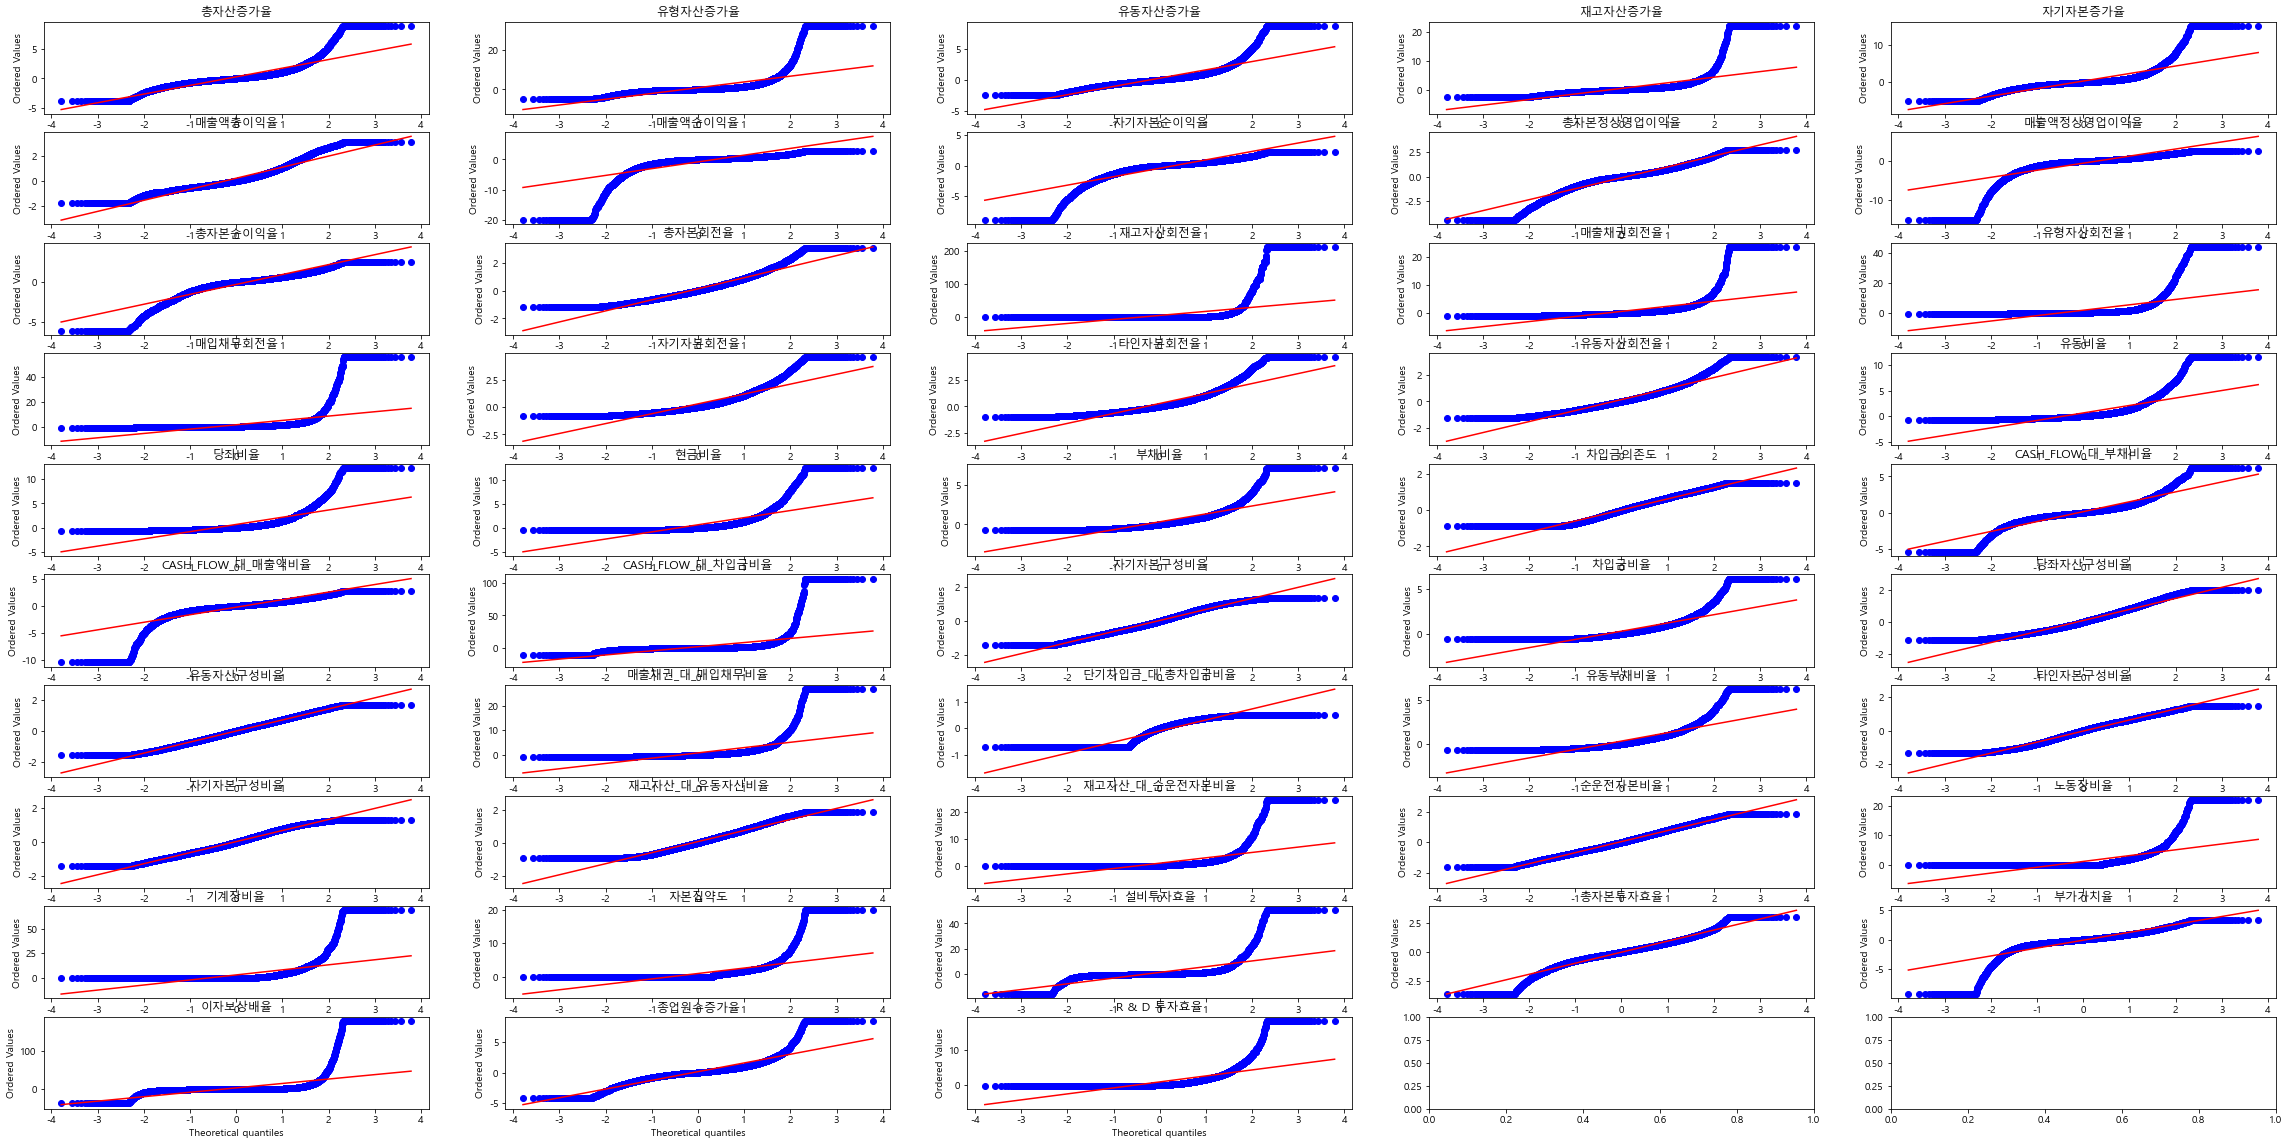

In [169]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(10, 5)
fig.set_size_inches((40,20))

stats.probplot(rs_sc2['총자산증가율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("총자산증가율")
stats.probplot(rs_sc2['유형자산증가율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("유형자산증가율")
stats.probplot(rs_sc2['유동자산증가율'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("유동자산증가율")
stats.probplot(rs_sc2['재고자산증가율'],dist=stats.norm,plot=axes[0,3])
axes[0,3].title.set_text("재고자산증가율")
stats.probplot(rs_sc2['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
axes[0,4].title.set_text("자기자본증가율")
stats.probplot(rs_sc2['매출액총이익율'],dist=stats.norm,plot=axes[1,0])
axes[1,0].title.set_text("매출액총이익율")
stats.probplot(rs_sc2['매출액순이익율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("매출액순이익율")
stats.probplot(rs_sc2['자기자본순이익율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("자기자본순이익율")
stats.probplot(rs_sc2['총자본정상영업이익율'],dist=stats.norm,plot=axes[1,3])
axes[1,3].title.set_text("총자본정상영업이익율")
stats.probplot(rs_sc2['매출액정상영업이익율'],dist=stats.norm,plot=axes[1,4])
axes[1,4].title.set_text("매출액정상영업이익율")
stats.probplot(rs_sc2['총자본순이익율'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("총자본순이익율")
stats.probplot(rs_sc2['총자본회전율'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("총자본회전율")
stats.probplot(rs_sc2['재고자산회전율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("재고자산회전율")
stats.probplot(rs_sc2['매출채권회전율'],dist=stats.norm,plot=axes[2,3])
axes[2,3].title.set_text("매출채권회전율")
stats.probplot(rs_sc2['유형자산회전율'],dist=stats.norm,plot=axes[2,4])
axes[2,4].title.set_text("유형자산회전율")
stats.probplot(rs_sc2['매입채무회전율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("매입채무회전율")
stats.probplot(rs_sc2['자기자본회전율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("자기자본회전율")
stats.probplot(rs_sc2['타인자본회전율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("타인자본회전율")
stats.probplot(rs_sc2['유동자산회전율'],dist=stats.norm,plot=axes[3,3])
axes[3,3].title.set_text("유동자산회전율")
stats.probplot(rs_sc2['유동비율'],dist=stats.norm,plot=axes[3,4])
axes[3,4].title.set_text("유동비율")
stats.probplot(rs_sc2['당좌비율'],dist=stats.norm,plot=axes[4,0])
axes[4,0].title.set_text("당좌비율")
stats.probplot(rs_sc2['현금비율'],dist=stats.norm,plot=axes[4,1])
axes[4,1].title.set_text("현금비율")
stats.probplot(rs_sc2['부채비율'],dist=stats.norm,plot=axes[4,2])
axes[4,2].title.set_text("부채비율")
stats.probplot(rs_sc2['차입금의존도'],dist=stats.norm,plot=axes[4,3])
axes[4,3].title.set_text("차입금의존도")
stats.probplot(rs_sc2['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[4,4])
axes[4,4].title.set_text("CASH_FLOW_대_부채비율")
stats.probplot(rs_sc2['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,0])
axes[5,0].title.set_text("CASH_FLOW_대_매출액비율")
stats.probplot(rs_sc2['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,1])
axes[5,1].title.set_text("CASH_FLOW_대_차입금비율")
stats.probplot(rs_sc2['자기자본구성비율'],dist=stats.norm,plot=axes[5,2])
axes[5,2].title.set_text("자기자본구성비율")
stats.probplot(rs_sc2['차입금비율'],dist=stats.norm,plot=axes[5,3])
axes[5,3].title.set_text("차입금비율")
stats.probplot(rs_sc2['당좌자산구성비율'],dist=stats.norm,plot=axes[5,4])
axes[5,4].title.set_text("당좌자산구성비율")
stats.probplot(rs_sc2['유동자산구성비율'],dist=stats.norm,plot=axes[6,0])
axes[6,0].title.set_text("유동자산구성비율")
stats.probplot(rs_sc2['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,1])
axes[6,1].title.set_text("매출채권_대_매입채무비율")
stats.probplot(rs_sc2['단기차입금_대_총차입금비율'],dist=stats.norm,plot=axes[6,2])
axes[6,2].title.set_text("단기차입금_대_총차입금비율")
stats.probplot(rs_sc2['유동부채비율'],dist=stats.norm,plot=axes[6,3])
axes[6,3].title.set_text("유동부채비율")
stats.probplot(rs_sc2['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
axes[6,4].title.set_text("타인자본구성비율")
stats.probplot(rs_sc2['자기자본구성비율'],dist=stats.norm,plot=axes[7,0])
axes[7,0].title.set_text("자기자본구성비율")
stats.probplot(rs_sc2['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,1])
axes[7,1].title.set_text("재고자산_대_유동자산비율")
stats.probplot(rs_sc2['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,2])
axes[7,2].title.set_text("재고자산_대_순운전자본비율")
stats.probplot(rs_sc2['순운전자본비율'],dist=stats.norm,plot=axes[7,3])
axes[7,3].title.set_text("순운전자본비율")
stats.probplot(rs_sc2['노동장비율'],dist=stats.norm,plot=axes[7,4])
axes[7,4].title.set_text("노동장비율")
stats.probplot(rs_sc2['기계장비율'],dist=stats.norm,plot=axes[8,0])
axes[8,0].title.set_text("기계장비율")
stats.probplot(rs_sc2['자본집약도'],dist=stats.norm,plot=axes[8,1])
axes[8,1].title.set_text("자본집약도")
stats.probplot(rs_sc2['설비투자효율'],dist=stats.norm,plot=axes[8,2])
axes[8,2].title.set_text("설비투자효율")
stats.probplot(rs_sc2['총자본투자효율'],dist=stats.norm,plot=axes[8,3])
axes[8,3].title.set_text("총자본투자효율")
stats.probplot(rs_sc2['부가가치율'],dist=stats.norm,plot=axes[8,4])
axes[8,4].title.set_text("부가가치율")
stats.probplot(rs_sc2['이자보상배율'],dist=stats.norm,plot=axes[9,0])
axes[9,0].title.set_text("이자보상배율")
stats.probplot(rs_sc2['종업원수증가율'],dist=stats.norm,plot=axes[9,1])
axes[9,1].title.set_text("종업원수증가율")
stats.probplot(rs_sc2['R & D 투자효율'],dist=stats.norm,plot=axes[9,2])
axes[9,2].title.set_text("R & D 투자효율")
# stats.probplot(rs_sc2['무형자산개발비비율'],dist=stats.norm,plot=axes[9,3])
# axes[9,3].title.set_text("무형자산개발비비율")

plt.show()

### 스탠다드 qq-plot

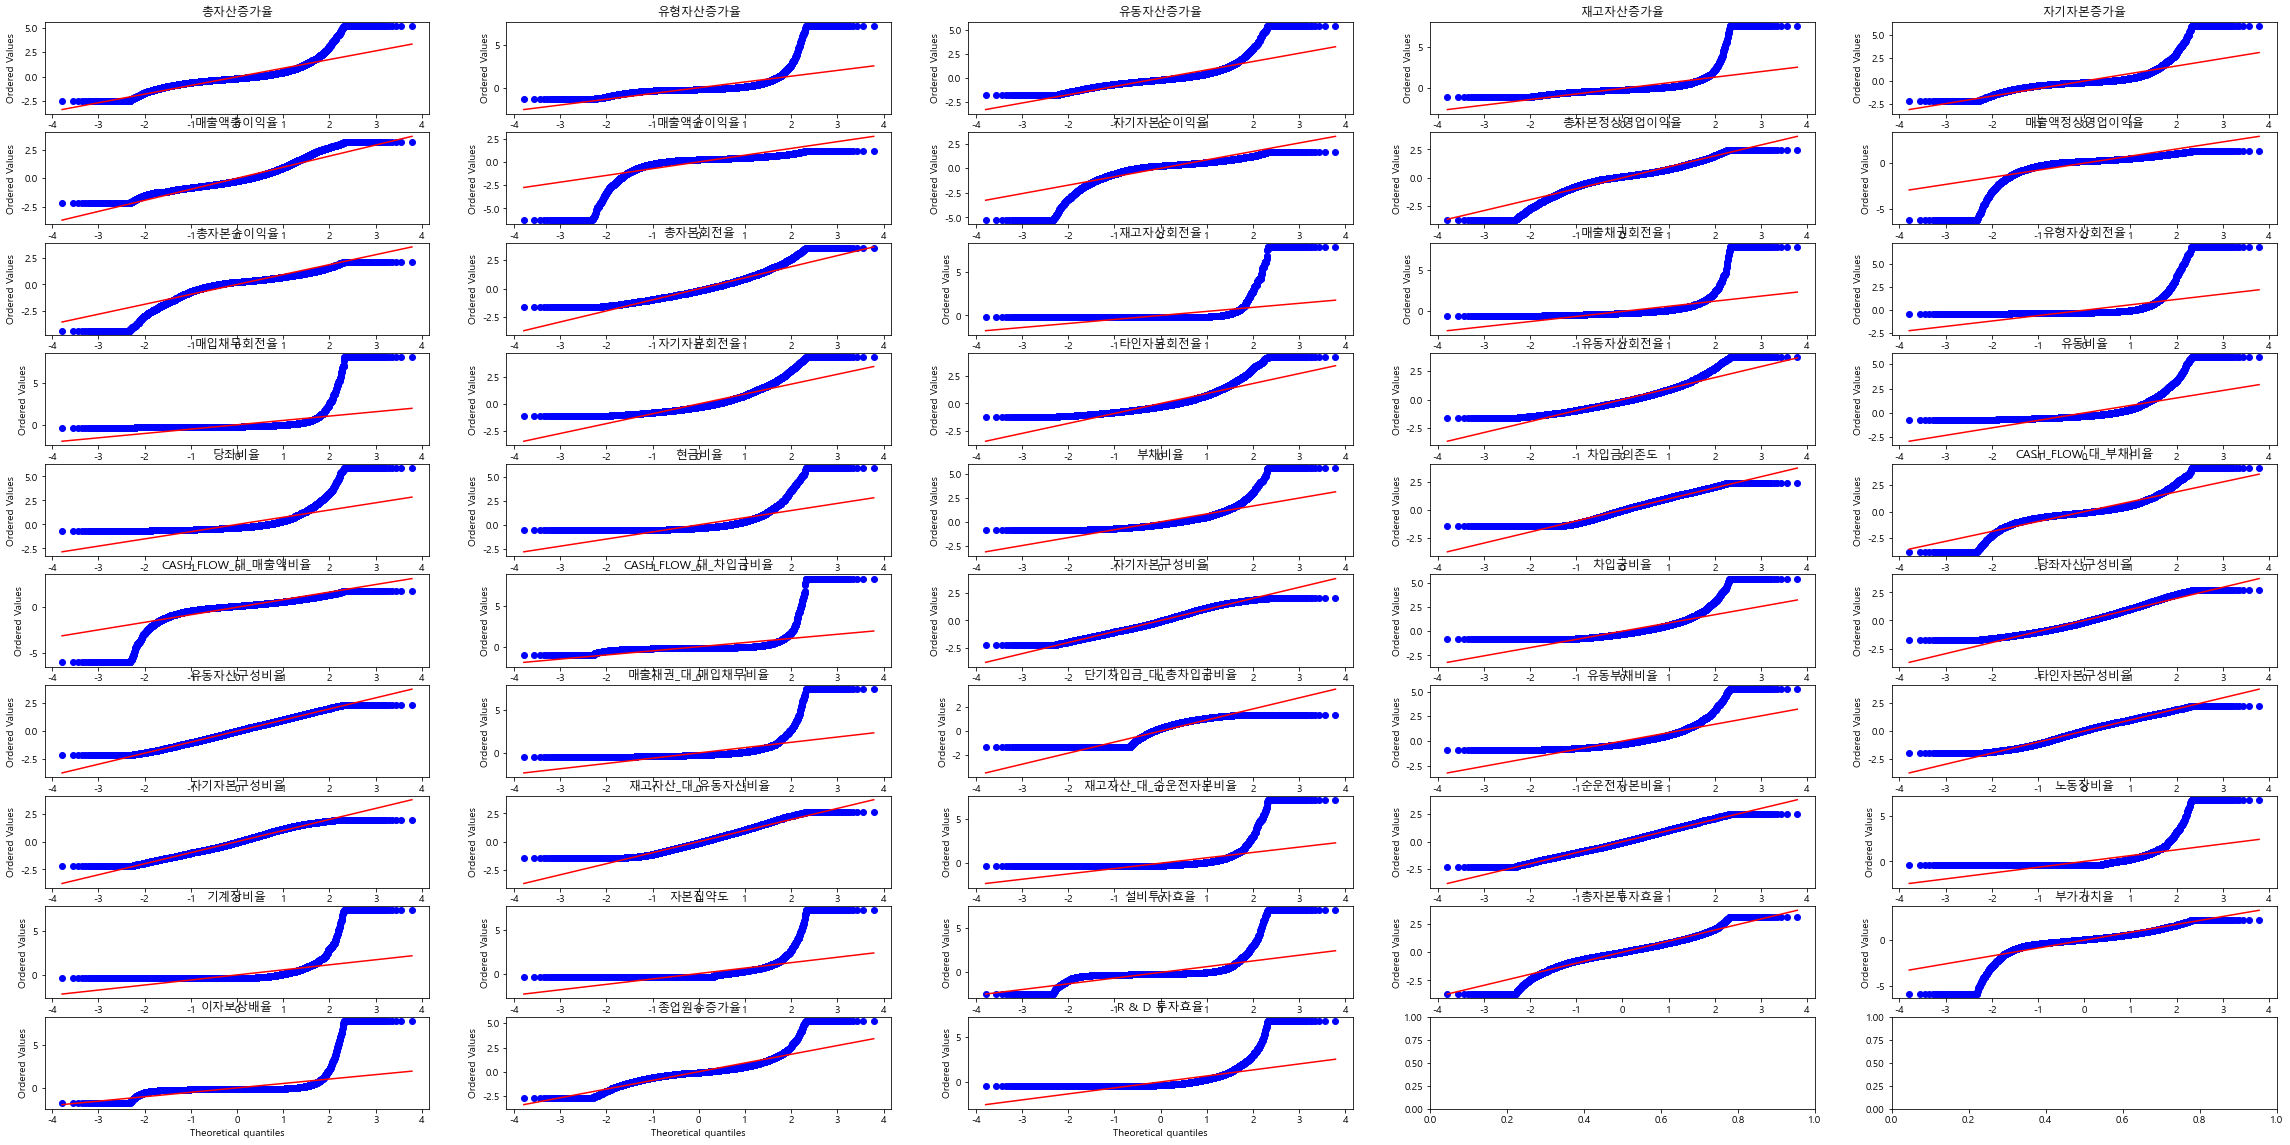

In [170]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(10, 5)
fig.set_size_inches((40,20))

stats.probplot(ss_sc2['총자산증가율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("총자산증가율")
stats.probplot(ss_sc2['유형자산증가율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("유형자산증가율")
stats.probplot(ss_sc2['유동자산증가율'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("유동자산증가율")
stats.probplot(ss_sc2['재고자산증가율'],dist=stats.norm,plot=axes[0,3])
axes[0,3].title.set_text("재고자산증가율")
stats.probplot(ss_sc2['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
axes[0,4].title.set_text("자기자본증가율")
stats.probplot(ss_sc2['매출액총이익율'],dist=stats.norm,plot=axes[1,0])
axes[1,0].title.set_text("매출액총이익율")
stats.probplot(ss_sc2['매출액순이익율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("매출액순이익율")
stats.probplot(ss_sc2['자기자본순이익율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("자기자본순이익율")
stats.probplot(ss_sc2['총자본정상영업이익율'],dist=stats.norm,plot=axes[1,3])
axes[1,3].title.set_text("총자본정상영업이익율")
stats.probplot(ss_sc2['매출액정상영업이익율'],dist=stats.norm,plot=axes[1,4])
axes[1,4].title.set_text("매출액정상영업이익율")
stats.probplot(ss_sc2['총자본순이익율'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("총자본순이익율")
stats.probplot(ss_sc2['총자본회전율'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("총자본회전율")
stats.probplot(ss_sc2['재고자산회전율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("재고자산회전율")
stats.probplot(ss_sc2['매출채권회전율'],dist=stats.norm,plot=axes[2,3])
axes[2,3].title.set_text("매출채권회전율")
stats.probplot(ss_sc2['유형자산회전율'],dist=stats.norm,plot=axes[2,4])
axes[2,4].title.set_text("유형자산회전율")
stats.probplot(ss_sc2['매입채무회전율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("매입채무회전율")
stats.probplot(ss_sc2['자기자본회전율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("자기자본회전율")
stats.probplot(ss_sc2['타인자본회전율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("타인자본회전율")
stats.probplot(ss_sc2['유동자산회전율'],dist=stats.norm,plot=axes[3,3])
axes[3,3].title.set_text("유동자산회전율")
stats.probplot(ss_sc2['유동비율'],dist=stats.norm,plot=axes[3,4])
axes[3,4].title.set_text("유동비율")
stats.probplot(ss_sc2['당좌비율'],dist=stats.norm,plot=axes[4,0])
axes[4,0].title.set_text("당좌비율")
stats.probplot(ss_sc2['현금비율'],dist=stats.norm,plot=axes[4,1])
axes[4,1].title.set_text("현금비율")
stats.probplot(ss_sc2['부채비율'],dist=stats.norm,plot=axes[4,2])
axes[4,2].title.set_text("부채비율")
stats.probplot(ss_sc2['차입금의존도'],dist=stats.norm,plot=axes[4,3])
axes[4,3].title.set_text("차입금의존도")
stats.probplot(ss_sc2['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[4,4])
axes[4,4].title.set_text("CASH_FLOW_대_부채비율")
stats.probplot(ss_sc2['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,0])
axes[5,0].title.set_text("CASH_FLOW_대_매출액비율")
stats.probplot(ss_sc2['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,1])
axes[5,1].title.set_text("CASH_FLOW_대_차입금비율")
stats.probplot(ss_sc2['자기자본구성비율'],dist=stats.norm,plot=axes[5,2])
axes[5,2].title.set_text("자기자본구성비율")
stats.probplot(ss_sc2['차입금비율'],dist=stats.norm,plot=axes[5,3])
axes[5,3].title.set_text("차입금비율")
stats.probplot(ss_sc2['당좌자산구성비율'],dist=stats.norm,plot=axes[5,4])
axes[5,4].title.set_text("당좌자산구성비율")
stats.probplot(ss_sc2['유동자산구성비율'],dist=stats.norm,plot=axes[6,0])
axes[6,0].title.set_text("유동자산구성비율")
stats.probplot(ss_sc2['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,1])
axes[6,1].title.set_text("매출채권_대_매입채무비율")
stats.probplot(ss_sc2['단기차입금_대_총차입금비율'],dist=stats.norm,plot=axes[6,2])
axes[6,2].title.set_text("단기차입금_대_총차입금비율")
stats.probplot(ss_sc2['유동부채비율'],dist=stats.norm,plot=axes[6,3])
axes[6,3].title.set_text("유동부채비율")
stats.probplot(ss_sc2['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
axes[6,4].title.set_text("타인자본구성비율")
stats.probplot(ss_sc2['자기자본구성비율'],dist=stats.norm,plot=axes[7,0])
axes[7,0].title.set_text("자기자본구성비율")
stats.probplot(ss_sc2['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,1])
axes[7,1].title.set_text("재고자산_대_유동자산비율")
stats.probplot(ss_sc2['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,2])
axes[7,2].title.set_text("재고자산_대_순운전자본비율")
stats.probplot(ss_sc2['순운전자본비율'],dist=stats.norm,plot=axes[7,3])
axes[7,3].title.set_text("순운전자본비율")
stats.probplot(ss_sc2['노동장비율'],dist=stats.norm,plot=axes[7,4])
axes[7,4].title.set_text("노동장비율")
stats.probplot(ss_sc2['기계장비율'],dist=stats.norm,plot=axes[8,0])
axes[8,0].title.set_text("기계장비율")
stats.probplot(ss_sc2['자본집약도'],dist=stats.norm,plot=axes[8,1])
axes[8,1].title.set_text("자본집약도")
stats.probplot(ss_sc2['설비투자효율'],dist=stats.norm,plot=axes[8,2])
axes[8,2].title.set_text("설비투자효율")
stats.probplot(ss_sc2['총자본투자효율'],dist=stats.norm,plot=axes[8,3])
axes[8,3].title.set_text("총자본투자효율")
stats.probplot(ss_sc2['부가가치율'],dist=stats.norm,plot=axes[8,4])
axes[8,4].title.set_text("부가가치율")
stats.probplot(ss_sc2['이자보상배율'],dist=stats.norm,plot=axes[9,0])
axes[9,0].title.set_text("이자보상배율")
stats.probplot(ss_sc2['종업원수증가율'],dist=stats.norm,plot=axes[9,1])
axes[9,1].title.set_text("종업원수증가율")
stats.probplot(ss_sc2['R & D 투자효율'],dist=stats.norm,plot=axes[9,2])
axes[9,2].title.set_text("R & D 투자효율")
# stats.probplot(ss_sc2['무형자산개발비비율'],dist=stats.norm,plot=axes[9,3])
# axes[9,3].title.set_text("무형자산개발비비율")

plt.show()

### 드러운 다중공선성 확인하기

In [86]:
df1 = df1.drop(columns=['유동자산구성비율','타인자본구성비율','유동비율','총자본회전율','당좌자산구성비율','부채비율','자기자본구성비율','매출액순이익율',
                        '차입금비율','유동자산회전율','총자본투자효율','총자본순이익율','자기자본회전율','매출액정상영업이익율','차입금의존도','당좌비율','노동장비율'])

1차 다중공선성 확인하기

In [171]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(df1.iloc[:,3:],i)for i in range(df1.iloc[:,3:].shape[1])]
vif['features'] = df1.iloc[:,3:].columns
# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF_Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF_Factor,features
0,357.376788,유동자산구성비율
1,220.720172,당좌자산구성비율
2,125.144162,타인자본구성비율
3,117.605831,유동비율
4,105.265101,당좌비율
5,64.471498,부채비율
6,59.900559,총자본회전율
7,53.542653,유동부채비율
8,42.465497,차입금의존도
9,39.791471,순운전자본비율


1차 제거 후 히트맵 함 보기

In [91]:
df_corr = df1.corr(method='pearson')
df_corr

,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,재고자산증가율,자기자본증가율,매출액총이익율,자기자본순이익율,총자본정상영업이익율,재고자산회전율,...,재고자산_대_유동자산비율,재고자산_대_순운전자본비율,순운전자본비율,기계장비율,자본집약도,설비투자효율,부가가치율,종업원수증가율,R & D 투자효율,직원감소율여부
이자보상배율,1.000000,0.038867,0.004607,0.030755,0.008684,0.033086,0.100449,0.142128,0.253122,0.067653,...,-0.077736,-0.039719,0.178214,-0.020741,-0.015212,0.098078,0.137678,0.023621,-0.053982,-0.008140
총자산증가율,0.038867,1.000000,0.366250,0.754479,0.261813,0.573234,0.133780,0.188028,0.169678,0.018581,...,-0.090642,-0.011692,0.095006,-0.012489,0.056700,0.064963,0.123904,0.200346,0.059919,0.155542
유형자산증가율,0.004607,0.366250,1.000000,0.141806,0.213873,0.134612,0.076780,0.018067,0.013768,0.025681,...,-0.047380,-0.015444,0.026296,-0.015273,0.037377,-0.017749,-0.016788,0.152726,0.058934,0.106369
유동자산증가율,0.030755,0.754479,0.141806,1.000000,0.261838,0.485571,0.112635,0.124235,0.141147,0.022378,...,-0.110351,-0.008035,0.142520,-0.002489,0.048932,0.053084,0.074776,0.130932,0.029054,0.104307
재고자산증가율,0.008684,0.261813,0.213873,0.261838,1.000000,0.105301,0.043052,0.062246,0.065252,-0.035515,...,0.026673,0.014207,0.036941,-0.007008,0.021883,0.016042,0.022311,0.100606,0.025481,0.063740
자기자본증가율,0.033086,0.573234,0.134612,0.485571,0.105301,1.000000,0.132915,0.251562,0.212623,0.025094,...,-0.088660,-0.017153,0.142810,-0.020597,0.006525,0.100083,0.143586,0.101415,0.027520,0.078426
매출액총이익율,0.100449,0.133780,0.076780,0.112635,0.043052,0.132915,1.000000,0.211172,0.256102,0.036626,...,-0.028910,-0.037633,0.260578,-0.095362,-0.009338,0.073767,0.253147,0.083303,0.230945,0.030174
자기자본순이익율,0.142128,0.188028,0.018067,0.124235,0.062246,0.251562,0.211172,1.000000,0.690531,0.013493,...,0.017035,0.019816,0.235993,0.043405,0.019009,0.229538,0.569410,0.120664,-0.123476,0.005815
총자본정상영업이익율,0.253122,0.169678,0.013768,0.141147,0.065252,0.212623,0.256102,0.690531,1.000000,0.013954,...,0.019407,0.011294,0.107138,0.046015,0.009416,0.207785,0.524390,0.155836,-0.288651,0.034022
재고자산회전율,0.067653,0.018581,0.025681,0.022378,-0.035515,0.025094,0.036626,0.013493,0.013954,1.000000,...,-0.297019,-0.076565,0.082760,-0.039577,0.026887,0.229265,0.079947,0.009022,0.054563,0.025066


In [93]:
df_corr['이자보상배율'].sort_values(ascending=False)

이자보상배율               1.000000
CASH_FLOW_대_부채비율     0.303957
CASH_FLOW_대_차입금비율    0.288947
타인자본회전율              0.275553
총자본정상영업이익율           0.253122
순운전자본비율              0.178214
CASH_FLOW_대_매출액비율    0.147008
자기자본순이익율             0.142128
부가가치율                0.137678
현금비율                 0.123215
매출액총이익율              0.100449
설비투자효율               0.098078
재고자산회전율              0.067653
총자산증가율               0.038867
자기자본증가율              0.033086
유동자산증가율              0.030755
종업원수증가율              0.023621
유형자산회전율              0.022865
매출채권_대_매입채무비율        0.019807
재고자산증가율              0.008684
유형자산증가율              0.004607
매출채권회전율             -0.001400
매입채무회전율             -0.002721
직원감소율여부             -0.008140
자본집약도               -0.015212
기계장비율               -0.020741
재고자산_대_순운전자본비율      -0.039719
R & D 투자효율          -0.053982
재고자산_대_유동자산비율       -0.077736
유동부채비율              -0.109994
단기차입금_대_총차입금비율      -0.160165
Name: 이자보상배율, dtype: float64

<AxesSubplot:>

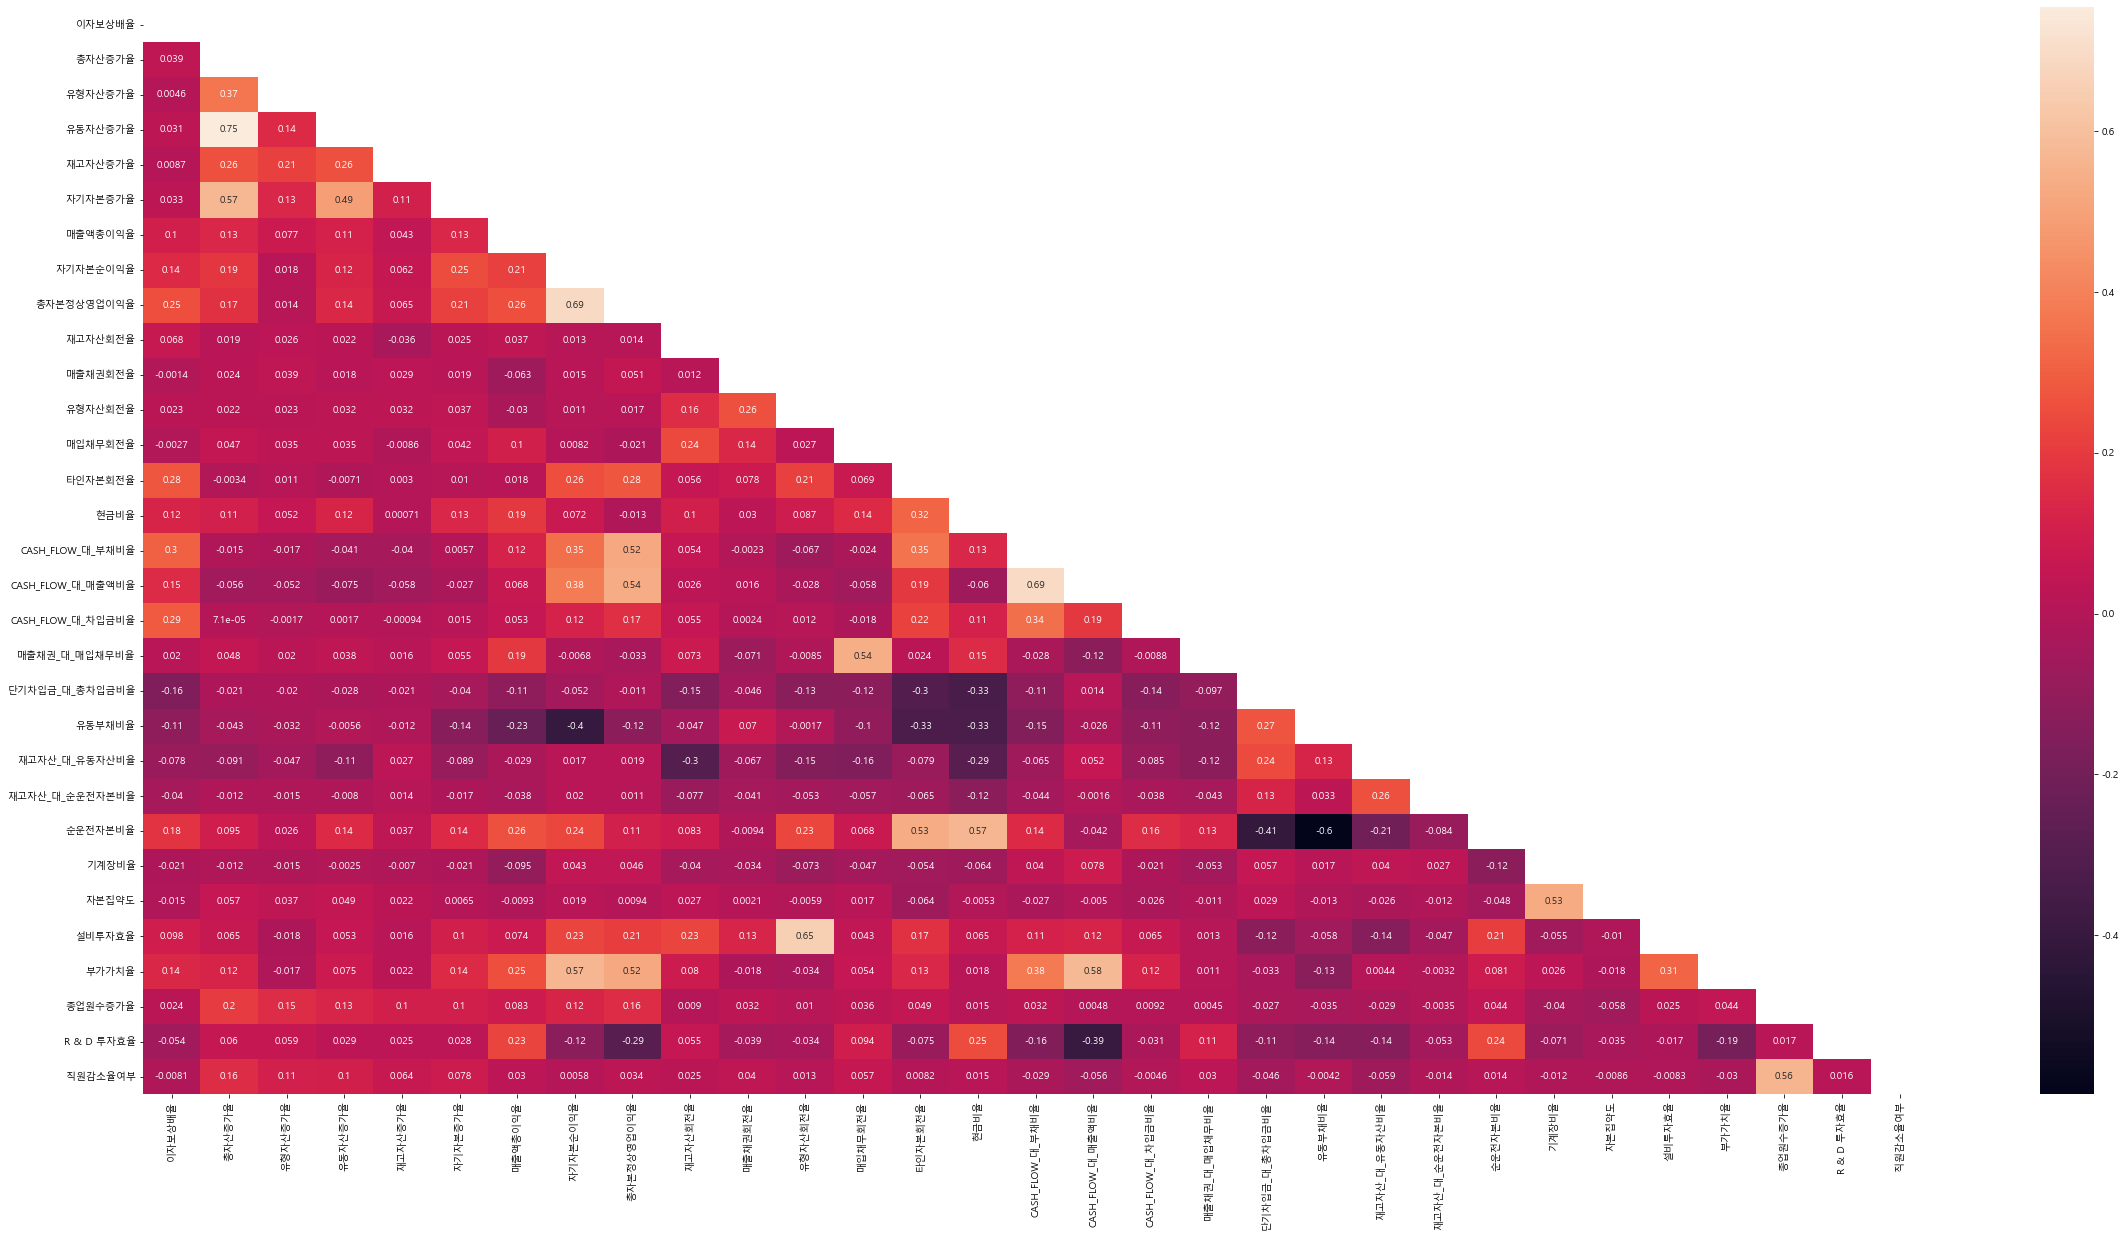

In [94]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
plt.figure(figsize=(40,20))
sns.heatmap(df1.corr(),annot=True,mask=mask)

<AxesSubplot:>

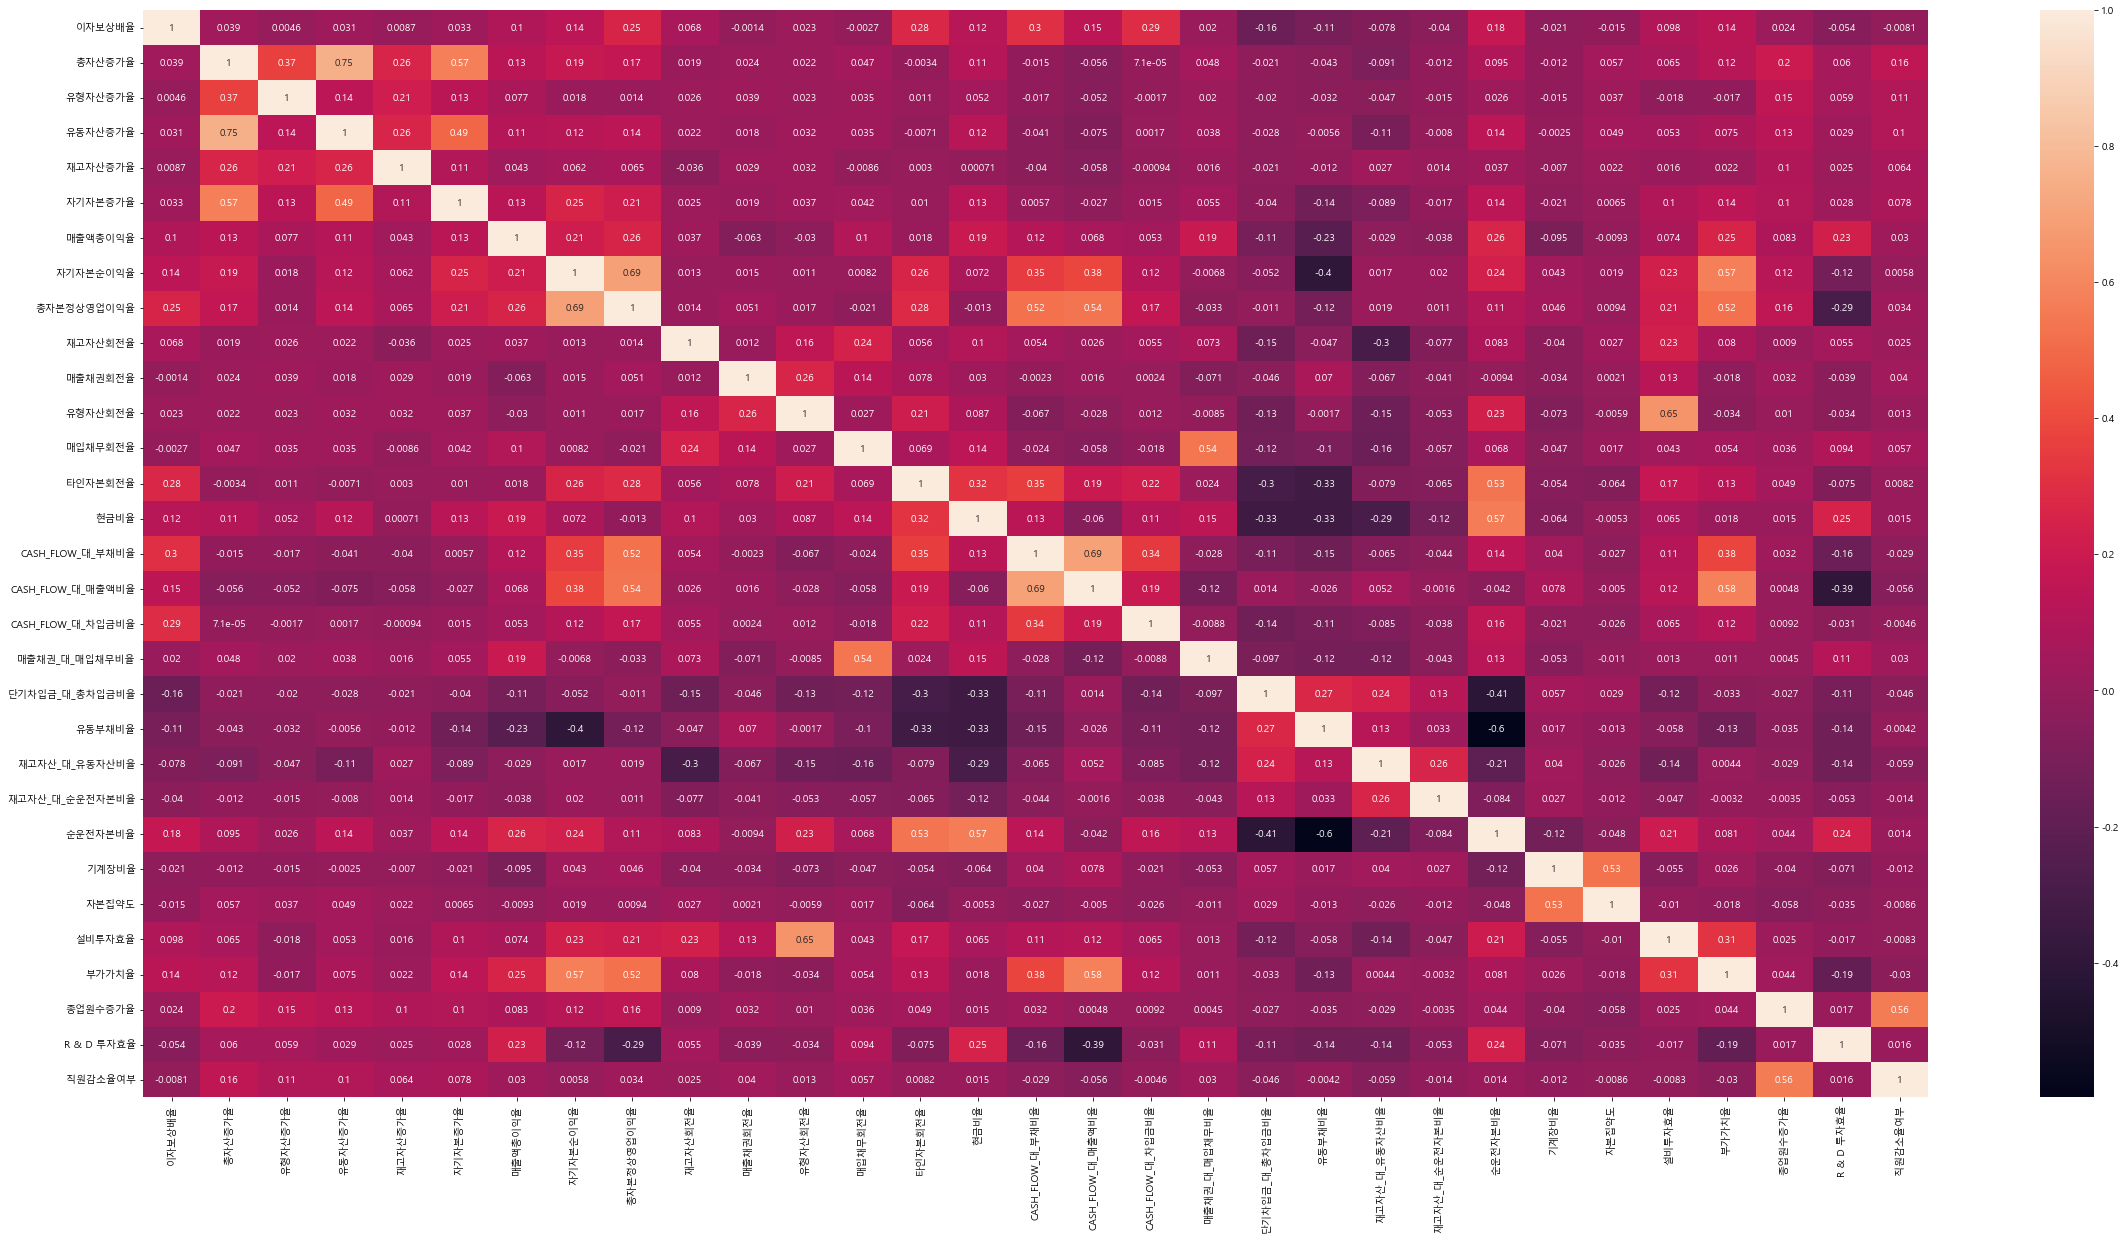

In [96]:
plt.figure(figsize=(40,20))
sns.heatmap(df1.corr(),annot=True)

### 일단 회귀분석 합니당!

In [24]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = df1['이자보상배율']
feature = df1.iloc[:,1:]

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')

# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 이자보상배율   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     68.29
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:12:47   Log-Likelihood:                -57870.
No. Observations:                9064   AIC:                         1.158e+05
Df Residuals:                    9032   BIC:                         1.160e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -10.4405      6.092     -1.714      0.087     -22.383       1.502
총자산증가율                0.1757      0.090      1.951      0.051      -0.001       0.352
유형자산증가율              -0.0159      0.022     -0.729      0.466      -0.059       0.027
유동자산증가율              -0.0366      0.054     -0.680      0.497      -0.142       0.069
재고자산증가율              -0.0012      0.014     -0.088      0.930      -0.029       0.027
자기자본증가율              -0.0731      0.042     -1.732      0.083      -0.156       0.010
매출액총이익율               0.3064      0.114      2.694      0.007       0.083       0.529
자기자본순이익율             -0.6017      0.095     -6.357      0.000      -0.787      -0.416
총자본정상영업이익율            3.9036      0.333     11.722      0.000       3.251       4.556
재고자산회전율               0.0165      0.006      2.851      0.004       0.005       0.028
매출채권회전율              -0.0947      0.116     -0.818      0.414      -0.322       0.132
유형자산회전율              -0.2793      0.098     -2.848      0.004      -0.472      -0.087
매입채무회전율              -0.0692      0.023     -3.003      0.003      -0.114      -0.024
타인자본회전율              12.3763      1.172     10.558      0.000      10.078      14.674
현금비율                  0.0141      0.023      0.608      0.543      -0.031       0.059
CASH_FLOW_대_부채비율      1.1031      0.089     12.444      0.000       0.929       1.277
CASH_FLOW_대_매출액비율    -1.5109      0.163     -9.287      0.000      -1.830      -1.192
CASH_FLOW_대_차입금비율     0.0715      0.004     17.441      0.000       0.063       0.079
매출채권_대_매입채무비율         0.0030      0.002      1.209      0.227      -0.002       0.008
단기차입금_대_총차입금비율       -0.2832      0.048     -5.893      0.000      -0.377      -0.189
유동부채비율               -0.0083      0.021     -0.386      0.700      -0.050       0.034
재고자산_대_유동자산비율        -0.1366      0.105     -1.306      0.192      -0.342       0.068
재고자산_대_순운전자본비율       -0.0021      0.006     -0.338      0.735      -0.014       0.010
순운전자본비율               0.0575      0.106      0.542      0.588      -0.150       0.265
노동장비율             -5.788e-06   7.66e-06     -0.756      0.450   -2.08e-05    9.22e-06
기계장비율             -2.632e-06   5.41e-06     -0.487      0.626   -1.32e-05    7.97e-06
자본집약도               1.91e-06   1.83e-06      1.044      0.296   -1.68e-06     5.5e-06
설비투자효율                0.0119      0.005      2.610      0.009       0.003       0.021
부가가치율                 0.2408      0.087      2.759      0.006       0.070       0.412
종업원수증가율              -0.0423      0.086     -0.490      0.624      -0.211       0.127
R & D 투자효율           -1.0210      0.288     -3.544      0.000      -1.586      -0.456
직원감소율여부             -10.0554      6.794     -1.480      0.139     -23.373       3.262
=========================================================================

어우... 다공성.....

### 후진제거법을 사용해서 최적의 피쳐를 찾아봅시당

                            OLS Regression Results                            
Dep. Variable:                 이자보상배율   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     149.9
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:13:38   Log-Likelihood:                -57880.
No. Observations:                9064   AIC:                         1.158e+05
Df Residuals:                    9049   BIC:                         1.159e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -16.3921      4.84

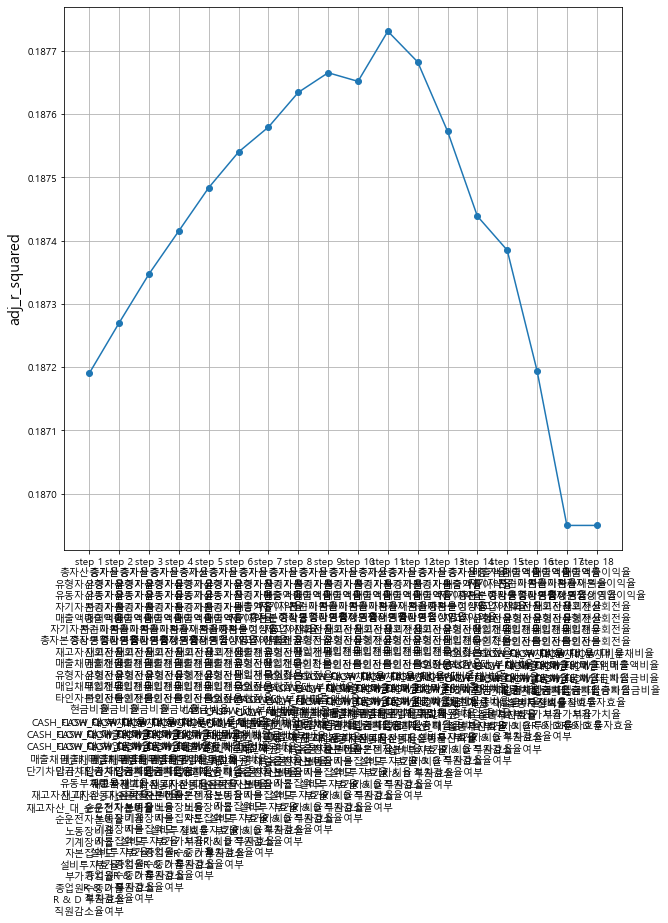

In [33]:
def backward_regression(feature, target,
                           initial_list=[], 
                           threshold_out = 0.05):
    
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")
    
    feature_list = feature.columns.tolist()  
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature.columns.tolist() 
    
    while True:
        changed=False
        model = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        
        step += 1
        steps.append(step)        
        adj_r_squared = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())
        
        if not changed:
            break
    
    # 최종모델 출력
    model = sm.OLS(target, sm.add_constant(feature[included])).fit()
    print(model.summary())
    print(feature[included].columns)

    
    fig = plt.figure(figsize=(10,10))
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=10)
    plt.plot(steps, adj_r_squared_list, marker='o')
    plt.ylabel('adj_r_squared',fontsize=15)
    plt.grid(True)
    plt.show()

    return model

backward_model = backward_regression(df1.drop(['이자보상배율'],axis=1), df1['이자보상배율'])

### 회귀 후 나온 피쳐들간의 공선성 있는지 확인

In [26]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df1[['매출액총이익율', '자기자본순이익율', '총자본정상영업이익율', '재고자산회전율', '유형자산회전율', '매입채무회전율',
       '타인자본회전율', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율', 'CASH_FLOW_대_차입금비율',
       '단기차입금_대_총차입금비율', '설비투자효율', '부가가치율', 'R & D 투자효율']])

,VIF Factor,features
0,3.038321,CASH_FLOW_대_매출액비율
1,2.994613,부가가치율
2,2.847618,CASH_FLOW_대_부채비율
3,2.710719,총자본정상영업이익율
4,2.689207,매출액총이익율
5,2.533103,타인자본회전율
6,2.457465,설비투자효율
7,2.390777,유형자산회전율
8,2.212673,자기자본순이익율
9,1.879410,단기차입금_대_총차입금비율


In [27]:
df1.columns

Index(['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율', '재고자산증가율', '자기자본증가율',
       '매출액총이익율', '자기자본순이익율', '총자본정상영업이익율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '타인자본회전율', '현금비율', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '매출채권_대_매입채무비율', '단기차입금_대_총차입금비율', '유동부채비율',
       '재고자산_대_유동자산비율', '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도',
       '설비투자효율', '부가가치율', '종업원수증가율', 'R & D 투자효율', '직원감소율여부'],
      dtype='object')

In [28]:
x = df1[['총자산증가율', '유형자산증가율', '유동자산증가율', '재고자산증가율', '자기자본증가율',
       '매출액총이익율', '자기자본순이익율', '총자본정상영업이익율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '타인자본회전율', '현금비율', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '매출채권_대_매입채무비율', '단기차입금_대_총차입금비율', '유동부채비율',
       '재고자산_대_유동자산비율', '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도',
       '설비투자효율', '부가가치율', '종업원수증가율', 'R & D 투자효율', '직원감소율여부']]
y = df1['이자보상배율']

### 릿지를 함 해봅니다!

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
%matplotlib inline

ridge = Ridge(alpha = 100)
neg_mse_scores = cross_val_score(ridge, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-24278.167 -19428.669 -24828.296 -12968.203 -23441.092]
 5 folds 의 개별 RMSE scores :  [155.815 139.387 157.57  113.878 153.105]
 5 folds 의 평균 RMSE : 143.951 


alpha 500 일 때 5 folds 의 평균 RMSE : 143.943 
alpha 1000 일 때 5 folds 의 평균 RMSE : 143.940 
alpha 1500 일 때 5 folds 의 평균 RMSE : 143.940 
alpha 2000 일 때 5 folds 의 평균 RMSE : 143.941 
alpha 3000 일 때 5 folds 의 평균 RMSE : 143.947 


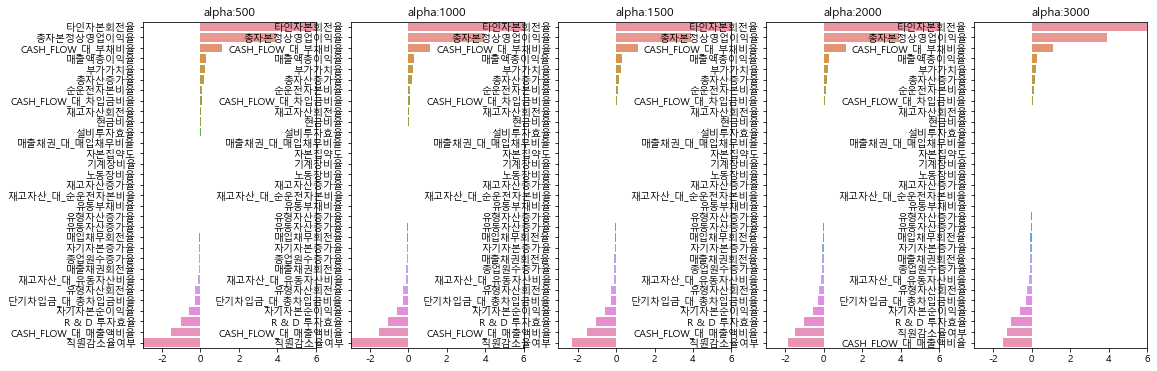

,alpha:500,alpha:1000,alpha:1500,alpha:2000,alpha:3000
타인자본회전율,11.985103,11.617472,11.271957,10.946720,10.350424
총자본정상영업이익율,3.908882,3.912238,3.914571,3.916106,3.917204
CASH_FLOW_대_부채비율,1.109585,1.115391,1.120784,1.125839,1.135091
매출액총이익율,0.300803,0.295475,0.290481,0.285806,0.277317
부가가치율,0.241006,0.240752,0.240391,0.239996,0.239173
총자산증가율,0.173747,0.173623,0.173875,0.174246,0.175075
순운전자본비율,0.072008,0.084973,0.097019,0.108308,0.128954
CASH_FLOW_대_차입금비율,0.071532,0.071611,0.071687,0.071760,0.071895
재고자산회전율,0.016450,0.016419,0.016396,0.016377,0.016343
현금비율,0.014547,0.014900,0.015213,0.015498,0.016005


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
%matplotlib inline

# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [500,1000,1500,2000,3000]

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구하고, 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(x, y)
   
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

     # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_, index=x.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

# alpha 값에 따른 컬럼별 회귀계수 출력
sort_column = 'alpha:'+str(alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

In [ ]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df1[['매출액총이익율', '자기자본순이익율', '총자본정상영업이익율', '재고자산회전율', '유형자산회전율', '매입채무회전율',
       '타인자본회전율', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율', 'CASH_FLOW_대_차입금비율',
       '단기차입금_대_총차입금비율', '설비투자효율', '부가가치율', 'R & D 투자효율']])

### 라쏘도 해봅니당!

In [31]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 30,50,70,100,200]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=x, y_target_n=y)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Lasso #######
alpha 30일 때 5 폴드 세트의 평균 RMSE: 145.005 
alpha 50일 때 5 폴드 세트의 평균 RMSE: 145.501 
alpha 70일 때 5 폴드 세트의 평균 RMSE: 145.845 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 146.362 
alpha 200일 때 5 폴드 세트의 평균 RMSE: 147.271 


,alpha:30,alpha:50,alpha:70,alpha:100,alpha:200
총자본정상영업이익율,3.082302,2.173831,1.500375,0.769681,0.000000
CASH_FLOW_대_부채비율,1.159745,1.094109,1.029344,0.989896,0.962948
순운전자본비율,0.371062,0.309512,0.290913,0.271357,0.051825
부가가치율,0.082503,0.000000,0.000000,0.000000,0.000000
CASH_FLOW_대_차입금비율,0.076324,0.077612,0.078758,0.080211,0.084259
총자산증가율,0.044651,0.015909,0.003280,0.000000,0.000000
현금비율,0.025414,0.027257,0.030680,0.033847,0.050762
재고자산회전율,0.015328,0.014861,0.014199,0.013065,0.010632
설비투자효율,0.008269,0.007521,0.008328,0.010102,0.014581
매출채권_대_매입채무비율,0.003331,0.003763,0.003991,0.004008,0.002802


### 엘라스틱넷도 할게용

In [32]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 10,20,30,40,50]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=x, y_target_n=y)

# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

#######  ElasticNet #######
alpha 10일 때 5 폴드 세트의 평균 RMSE: 144.363 
alpha 20일 때 5 폴드 세트의 평균 RMSE: 144.725 
alpha 30일 때 5 폴드 세트의 평균 RMSE: 145.044 
alpha 40일 때 5 폴드 세트의 평균 RMSE: 145.298 
alpha 50일 때 5 폴드 세트의 평균 RMSE: 145.544 


,alpha:10,alpha:20,alpha:30,alpha:40,alpha:50
총자본정상영업이익율,3.457336,2.922675,2.464932,2.079513,1.749374
타인자본회전율,3.166100,1.156774,0.264160,0.000000,0.000000
CASH_FLOW_대_부채비율,1.218159,1.218550,1.198246,1.168002,1.134298
순운전자본비율,0.351557,0.386471,0.394003,0.380735,0.358225
부가가치율,0.188177,0.143650,0.101478,0.062222,0.025750
매출액총이익율,0.157141,0.115498,0.090223,0.072684,0.057737
총자산증가율,0.137464,0.091347,0.073980,0.060870,0.049384
CASH_FLOW_대_차입금비율,0.074182,0.075346,0.076227,0.076931,0.077544
현금비율,0.021522,0.022206,0.022208,0.022211,0.022516
재고자산회전율,0.016166,0.015967,0.015530,0.015225,0.015012
